In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import splat
import splat.database as spdb
import splat.plot as splot
import splat.photometry as sphot
import splat.empirical as spem
import seaborn as sns
import warnings
import copy
import astropy.units as u
import scipy.stats
from tqdm import tqdm
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.coordinates import Angle, Distance
from astroquery.vizier import Vizier
from astropy.time import Time


Adding 145 sources from C:\Users\ZIJIE\Documents\GitHub\splat/resources/Spectra/Public/LRIS-RED/ to spectral database
Adding 89 sources from C:\Users\ZIJIE\Documents\GitHub\splat/resources/Spectra/Public/MAGE/ to spectral database
Adding 2404 sources from C:\Users\ZIJIE\Documents\GitHub\splat/resources/Spectra/Public/SPEX-PRISM/ to spectral database
Could not import regions, which is required for some of the functionalities of this module.


In [4]:
import splat.empirical as spem

In [5]:
df_photometry = pd.read_csv('https://raw.githubusercontent.com/ZJI17/skrzypek2016/main/skrzypek2016.csv',delimiter=',')

In [6]:
df_photometry["imag"] = pd.to_numeric(df_photometry["imag"],errors="coerce")
df_photometry["e_imag"] = pd.to_numeric(df_photometry["e_imag"],errors="coerce")
df_photometry["zmag"] = pd.to_numeric(df_photometry["zmag"],errors="coerce")
df_photometry["e_zmag"] = pd.to_numeric(df_photometry["e_zmag"],errors="coerce")
df_photometry["W1mag"] = pd.to_numeric(df_photometry["W1mag"],errors="coerce")
df_photometry["e_W1mag"] = pd.to_numeric(df_photometry["e_W1mag"],errors="coerce")
df_photometry["W2mag"] = pd.to_numeric(df_photometry["W2mag"],errors="coerce")
df_photometry["e_W2mag"] = pd.to_numeric(df_photometry["e_W2mag"],errors="coerce")
df_photometry["PhType"] = pd.to_numeric(df_photometry["Ref"],errors="coerce")
df_photometry["Ref"] = pd.to_numeric(df_photometry["Ref"],errors="coerce")

In [7]:
dfsel =df_photometry

In [8]:
dfsel["SpType2"]=dfsel["SpType"]

In [9]:
convertion = {
"" : np.NAN,    
"M0" : 10,
"M0.5" : 11,
"M1" : 12,
"M1.5" : 13,
"M2" : 14,
"M2.5" : 15,
"M3" : 16,
"M3.5" : 17,
"M4" : 18,
"M4.5" : 19,
"M5" : 20,
"M5.5" : 21,
"M6" : 22,
"M6.5" : 23,
"M7" : 24,
"M7.5" : 25,
"M8" : 26,
"M8.5" : 27,
"M9" : 28,
"M9.5" : 29,
"L0" : 30,
"L0.5" : 31,
"L1" : 32,
"L1.5" : 33,
"L2" : 34,
"L2.5" : 35,
"L3" : 36,
"L3.5" : 37,
"L4" : 38,
"L4.5" : 39,
"L5" : 40,
"L5.5" : 41,
"L6" : 42,
"L6.5" : 43,
"L7" : 44,
"L7.5" : 45,
"L8" : 46,
"L8.5" : 47,
"L9" : 48,
"L9.5" : 49,
"T0" : 50,
"T0.5" : 51,
"T1" : 52,
"T1.5" : 53,
"T2" : 54,
"T2.5" : 55,
"T3" : 56,
"T3.5" : 57,
"T4" : 58,
"T4.5" : 59,
"T5" : 60,
"T5.5" : 61,
"T6" : 62,
"T6.5" : 63,
"T7" : 64,
"T7.5" : 65,
"T8" : 66,
"T8.5" : 67,
"T9" : 68,
"T9.5" : 69,
"T1+T4" : 52}

In [10]:
dfsel["SpType2"].str.strip().str.strip(":").replace(convertion)

0        NaN
1        NaN
2       38.0
3        NaN
4        NaN
        ... 
1356     NaN
1357     NaN
1358    33.0
1359     NaN
1360     NaN
Name: SpType2, Length: 1361, dtype: float64

In [11]:
dfsel["SpectralTnum"] =dfsel["SpType2"].str.strip().str.strip(":").replace(convertion)

In [12]:
dfsel["i-z"] = dfsel["imag"]-dfsel["zmag"]
dfsel["i-Y"] = dfsel["imag"]-dfsel["Ymag"]
dfsel["i-J"] = dfsel["imag"]-dfsel["Jmag"]
dfsel["i-H"] = dfsel["imag"]-dfsel["Hmag"]
dfsel["i-K"] = dfsel["imag"]-dfsel["Kmag"]
dfsel["i-W1"] = dfsel["imag"]-dfsel["W1mag"]
dfsel["i-W2"] = dfsel["imag"]-dfsel["W2mag"]
dfsel['z-Y'] = dfsel['zmag']-dfsel['Ymag']
dfsel['z-J'] = dfsel['zmag']-dfsel['Jmag']
dfsel['z-H'] = dfsel['zmag']-dfsel['Hmag']
dfsel['z-K'] = dfsel['zmag']-dfsel['Kmag']
dfsel['z-W1'] = dfsel['zmag']-dfsel['W1mag']
dfsel['z-W2'] = dfsel['zmag']-dfsel['W2mag']
dfsel['Y-J'] = dfsel['Ymag']-dfsel['Jmag']
dfsel['Y-H'] = dfsel['Ymag']-dfsel['Hmag']
dfsel['Y-K'] = dfsel['Ymag']-dfsel['Kmag']
dfsel['Y-W1'] = dfsel['Ymag']-dfsel['W1mag']
dfsel['Y-W2'] = dfsel['Ymag']-dfsel['W2mag']
dfsel['J-H'] = dfsel['Jmag']-dfsel['Hmag']
dfsel['J-K'] = dfsel['Jmag']-dfsel['Kmag']
dfsel['J-W1'] = dfsel['Jmag']-dfsel['W1mag']
dfsel['J-W2'] = dfsel['Jmag']-dfsel['W2mag']
dfsel['H-K'] = dfsel['Hmag']-dfsel['Kmag']
dfsel['H-W1'] = dfsel['Hmag']-dfsel['W1mag']
dfsel['H-W2'] = dfsel['Hmag']-dfsel['W2mag']
dfsel['K-W1'] = dfsel['Kmag']-dfsel['W1mag']
dfsel['K-W2'] = dfsel['Kmag']-dfsel['W2mag']
dfsel['W1-W2'] = dfsel['W1mag']-dfsel['W2mag']
dfsel['I-Z unc'] = np.sqrt(dfsel['e_imag']**2+dfsel['e_zmag']**2)
dfsel['I-Y unc'] = np.sqrt(dfsel['e_imag']**2+dfsel['e_Ymag']**2)
dfsel['I-J unc'] = np.sqrt(dfsel['e_imag']**2+dfsel['e_Jmag']**2)
dfsel['I-H unc'] = np.sqrt(dfsel['e_imag']**2+dfsel['e_Hmag']**2)
dfsel['I-K unc'] = np.sqrt(dfsel['e_imag']**2+dfsel['e_Kmag']**2)
dfsel['I-W1 unc'] = np.sqrt(dfsel['e_imag']**2+dfsel['e_W1mag']**2)
dfsel['I-W2 unc'] = np.sqrt(dfsel['e_imag']**2+dfsel['e_W2mag']**2)
dfsel['Z-Y unc'] = np.sqrt(dfsel['e_zmag']**2+dfsel['e_Ymag']**2)
dfsel['Z-J unc'] = np.sqrt(dfsel['e_zmag']**2+dfsel['e_Jmag']**2)
dfsel['Z-H unc'] = np.sqrt(dfsel['e_zmag']**2+dfsel['e_Hmag']**2)
dfsel['Z-K unc'] = np.sqrt(dfsel['e_zmag']**2+dfsel['e_Kmag']**2)
dfsel['Z-W1 unc'] = np.sqrt(dfsel['e_zmag']**2+dfsel['e_W1mag']**2)
dfsel['Z-W2 unc'] = np.sqrt(dfsel['e_zmag']**2+dfsel['e_W2mag']**2)
dfsel['Y-J unc'] = np.sqrt(dfsel['e_Ymag']**2+dfsel['e_Jmag']**2)
dfsel['Y-H unc'] = np.sqrt(dfsel['e_Ymag']**2+dfsel['e_Hmag']**2)
dfsel['Y-K unc'] = np.sqrt(dfsel['e_Ymag']**2+dfsel['e_Kmag']**2)
dfsel['Y-W1 unc'] = np.sqrt(dfsel['e_Ymag']**2+dfsel['e_W1mag']**2)
dfsel['Y-W2 unc'] = np.sqrt(dfsel['e_Ymag']**2+dfsel['e_W2mag']**2)
dfsel['J-H unc'] = np.sqrt(dfsel['e_Jmag']**2+dfsel['e_Hmag']**2)
dfsel['J-K unc'] = np.sqrt(dfsel['e_Jmag']**2+dfsel['e_Kmag']**2)
dfsel['J-W1 unc'] = np.sqrt(dfsel['e_Jmag']**2+dfsel['e_W1mag']**2)
dfsel['J-W2 unc'] = np.sqrt(dfsel['e_Jmag']**2+dfsel['e_W2mag']**2)
dfsel['H-K unc'] = np.sqrt(dfsel['e_Hmag']**2+dfsel['e_Kmag']**2)
dfsel['H-W1 unc'] = np.sqrt(dfsel['e_Hmag']**2+dfsel['e_W1mag']**2)
dfsel['H-W2 unc'] = np.sqrt(dfsel['e_Hmag']**2+dfsel['e_W2mag']**2)
dfsel['K-W1 unc'] = np.sqrt(dfsel['e_Kmag']**2+dfsel['e_W1mag']**2)
dfsel['K-W2 unc'] = np.sqrt(dfsel['e_Kmag']**2+dfsel['e_W2mag']**2)
dfsel['W1-W2 unc'] = np.sqrt(dfsel['e_W1mag']**2+dfsel['e_W2mag']**2)

In [13]:
dfsel = dfsel[dfsel['i-z'].notna()==True]
dfsel = dfsel[dfsel['i-Y'].notna()==True]
dfsel = dfsel[dfsel['i-J'].notna()==True]
dfsel = dfsel[dfsel['i-H'].notna()==True]
dfsel = dfsel[dfsel['i-K'].notna()==True]
dfsel = dfsel[dfsel['i-W1'].notna()==True]
dfsel = dfsel[dfsel['i-W2'].notna()==True]
dfsel = dfsel[dfsel['z-Y'].notna()==True]
dfsel = dfsel[dfsel['z-J'].notna()==True]
dfsel = dfsel[dfsel['z-H'].notna()==True]
dfsel = dfsel[dfsel['z-K'].notna()==True]
dfsel = dfsel[dfsel['z-W1'].notna()==True]
dfsel = dfsel[dfsel['z-W2'].notna()==True]
dfsel = dfsel[dfsel['Y-J'].notna()==True]
dfsel = dfsel[dfsel['Y-H'].notna()==True]
dfsel = dfsel[dfsel['Y-K'].notna()==True]
dfsel = dfsel[dfsel['Y-W1'].notna()==True]
dfsel = dfsel[dfsel['Y-W2'].notna()==True]
dfsel = dfsel[dfsel['J-H'].notna()==True]
dfsel = dfsel[dfsel['J-K'].notna()==True]
dfsel = dfsel[dfsel['J-W1'].notna()==True]
dfsel = dfsel[dfsel['J-W2'].notna()==True]
dfsel = dfsel[dfsel['H-K'].notna()==True]
dfsel = dfsel[dfsel['H-W1'].notna()==True]
dfsel = dfsel[dfsel['H-W2'].notna()==True]
dfsel = dfsel[dfsel['K-W1'].notna()==True]
dfsel = dfsel[dfsel['K-W2'].notna()==True]
dfsel = dfsel[dfsel['I-Z unc'].notna()==True]
dfsel = dfsel[dfsel['I-Y unc'].notna()==True]
dfsel = dfsel[dfsel['I-J unc'].notna()==True]
dfsel = dfsel[dfsel['I-H unc'].notna()==True]
dfsel = dfsel[dfsel['I-K unc'].notna()==True]
dfsel = dfsel[dfsel['I-W1 unc'].notna()==True]
dfsel = dfsel[dfsel['I-W2 unc'].notna()==True]
dfsel = dfsel[dfsel['Z-Y unc'].notna()==True]
dfsel = dfsel[dfsel['Z-J unc'].notna()==True]
dfsel = dfsel[dfsel['Z-H unc'].notna()==True]
dfsel = dfsel[dfsel['Z-K unc'].notna()==True]
dfsel = dfsel[dfsel['Z-W1 unc'].notna()==True]
dfsel = dfsel[dfsel['Z-W2 unc'].notna()==True]
dfsel = dfsel[dfsel['Y-J unc'].notna()==True]
dfsel = dfsel[dfsel['Y-H unc'].notna()==True]
dfsel = dfsel[dfsel['Y-K unc'].notna()==True]
dfsel = dfsel[dfsel['Y-W1 unc'].notna()==True]
dfsel = dfsel[dfsel['Y-W2 unc'].notna()==True]
dfsel = dfsel[dfsel['J-H unc'].notna()==True]
dfsel = dfsel[dfsel['J-K unc'].notna()==True]
dfsel = dfsel[dfsel['J-W1 unc'].notna()==True]
dfsel = dfsel[dfsel['J-W2 unc'].notna()==True]
dfsel = dfsel[dfsel['H-K unc'].notna()==True]
dfsel = dfsel[dfsel['H-W1 unc'].notna()==True]
dfsel = dfsel[dfsel['H-W2 unc'].notna()==True]
dfsel = dfsel[dfsel['K-W1 unc'].notna()==True]
dfsel = dfsel[dfsel['K-W2 unc'].notna()==True]
dfsel = dfsel[dfsel['W1-W2 unc'].notna()==True]

In [14]:
dfsel.dropna(subset=["SpectralTnum"], inplace=True)

In [15]:
#some reformatting 
#let's use numerical labels
def change(i):
    if i==Cata_list[0]:
        i=0
    elif i==Cata_list[1]:
        i=2
    elif i==Cata_list[2]:
        i=2
    elif i==Cata_list[3]:
        i=2
    elif i==Cata_list[4]:
        i=2
    elif i==Cata_list[5]:
        i=2
    elif i==Cata_list[6]:
        i=2
    elif i==Cata_list[7]:
        i=2
    elif i==Cata_list[8]:
        i=2
    elif i==Cata_list[9]:
        i=2
    elif i==Cata_list[10]:
        i=2
    elif i==Cata_list[11]:
        i=2
    elif i==Cata_list[12]:
        i=2
    elif i==Cata_list[13]:
        i=2
    elif i==Cata_list[14]:
        i=2
    elif i==Cata_list[15]:
        i=2
    elif i==Cata_list[16]:
        i=2
    elif i==Cata_list[17]:
        i=2
    elif i==Cata_list[18]:
        i=2
    elif i==Cata_list[19]:
        i=3
    elif i==Cata_list[20]:
        i=3
    elif i==Cata_list[21]:
        i=3
    elif i==Cata_list[22]:
        i=3
    elif i==Cata_list[23]:
        i=3
    elif i == Cata_list[24]:
        i = 3
    elif i == Cata_list[25]:
        i = 3
    elif i == Cata_list[26]:
        i = 3
    elif i == Cata_list[27]:
        i = 3
    elif i == Cata_list[28]:
        i = 1
    elif i == Cata_list[29]:
        i = 1
    elif i == Cata_list[30]:
        i = 1
    elif i == Cata_list[31]:
        i = 1
    elif i == Cata_list[32]:
        i = 1
    elif i == Cata_list[33]:
        i = 1
    elif i == Cata_list[34]:
        i = 1
    elif i == Cata_list[35]:
        i = 1
    elif i == Cata_list[36]:
        i = 1
    elif i == Cata_list[37]:
        i = 4
    elif i == Cata_list[38]:
        i = 4
    elif i == Cata_list[39]:
        i = 4
    elif i == Cata_list[40]:
        i = 5
    elif i == Cata_list[41]:
        i = 4
    elif i == Cata_list[42]:
        i = 4
    elif i == Cata_list[43]:
        i = 4
    elif i == Cata_list[44]:
        i = 4
    elif i == Cata_list[45]:
        i = 4
    elif i == Cata_list[46]:
        i = 5
    elif i == Cata_list[47]:
        i = 5
    elif i == Cata_list[48]:
        i = 5
    elif i == Cata_list[49]:
        i = 5
    elif i == Cata_list[50]:
        i = 5
    elif i == Cata_list[51]:
        i = 5
    elif i == Cata_list[52]:
        i = 5
    elif i == Cata_list[53]:
        i = 5

    return i



In [16]:
SpT_num = []
data2=dfsel.groupby(by='SpType')
Cata_list=list(data2.groups.keys())
print(Cata_list)
b=0
for a in Cata_list:
    b=b+1
print(b)


for i in Cata_list:
    dfsel.loc[dfsel['SpType'].isin([i]),'SpType']=change(i)
print(dfsel['SpType'])

SpT_num=dfsel['SpType']
SpT_num

['L0     ', 'L0.5   ', 'L0.5:  ', 'L0:    ', 'L1     ', 'L1.5   ', 'L1.5:  ', 'L1:    ', 'L2     ', 'L2.5   ', 'L2.5:  ', 'L2:    ', 'L3     ', 'L3.5   ', 'L3:    ', 'L4     ', 'L4.5   ', 'L4:    ', 'L5     ', 'L5.5   ', 'L6     ', 'L6.5   ', 'L7     ', 'L7.5   ', 'L8     ', 'L9     ', 'L9.5   ', 'M7     ', 'M7.5:  ', 'M8     ', 'M8.5   ', 'M8.5:  ', 'M9     ', 'M9.5   ', 'M9.5:  ', 'M9:    ', 'T0     ', 'T0.5   ', 'T1     ', 'T1+T4  ', 'T1.5   ', 'T2     ', 'T2.5   ', 'T3     ', 'T4.5   ', 'T5     ', 'T5.5   ', 'T6     ', 'T6.5   ', 'T7     ', 'T7.5   ', 'T8     ']
52
2       2
7       2
11      2
23      3
31      2
       ..
1343    1
1345    2
1349    2
1355    5
1358    2
Name: SpType, Length: 340, dtype: object


2       2
7       2
11      2
23      3
31      2
       ..
1343    1
1345    2
1349    2
1355    5
1358    2
Name: SpType, Length: 340, dtype: object

In [17]:
dfsel["SpSubT"] = SpT_num

In [18]:
dfsel[dfsel["SpSubT"].notna()==True]

,ULAS,imag,e_imag,zmag,e_zmag,Ymag,e_Ymag,Jmag,e_Jmag,Hmag,...,J-K unc,J-W1 unc,J-W2 unc,H-K unc,H-W1 unc,H-W2 unc,K-W1 unc,K-W2 unc,W1-W2 unc,SpSubT
2,J000112.24+153534.3,19.92,0.04,17.99,0.03,16.88,0.01,15.46,0.01,14.48,...,0.014142,0.022361,0.022361,0.014142,0.022361,0.022361,0.022361,0.022361,0.028284,2
7,J000334.77-001258.8,20.68,0.06,18.74,0.04,17.90,0.03,16.69,0.02,15.88,...,0.028284,0.036056,0.063246,0.028284,0.036056,0.063246,0.036056,0.063246,0.067082,2
11,J000646.79+151225.7,20.64,0.06,18.57,0.06,17.57,0.02,16.21,0.01,15.38,...,0.014142,0.031623,0.041231,0.014142,0.031623,0.041231,0.031623,0.041231,0.050000,2
23,J001608.49-004302.2,20.82,0.06,18.62,0.04,17.70,0.02,16.30,0.01,15.34,...,0.014142,0.031623,0.031623,0.014142,0.031623,0.031623,0.031623,0.031623,0.042426,3
31,J002138.89+002605.6,21.03,0.08,19.24,0.07,18.64,0.06,17.34,0.03,16.59,...,0.042426,0.058310,0.104403,0.042426,0.058310,0.104403,0.058310,0.104403,0.111803,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,J234539.07+005513.5,17.63,0.02,15.65,0.01,14.63,0.01,13.68,0.01,13.09,...,0.014142,0.031623,0.022361,0.014142,0.031623,0.022361,0.031623,0.022361,0.036056,1
1345,J234841.41-004022.7,21.54,0.10,19.47,0.07,18.56,0.05,17.48,0.03,16.88,...,0.050000,0.076158,0.281603,0.050000,0.076158,0.281603,0.080623,0.282843,0.288617,2
1349,J235128.75+003941.1,20.72,0.06,18.72,0.05,17.76,0.03,16.78,0.01,16.11,...,0.022361,0.041231,0.090554,0.028284,0.044721,0.092195,0.044721,0.092195,0.098489,2
1355,J235716.50+122741.9,23.02,0.39,19.45,0.12,17.34,0.02,16.10,0.01,16.49,...,0.041231,0.050990,0.041231,0.050000,0.058310,0.050000,0.064031,0.056569,0.064031,5


In [19]:
dfsel.dtypes

ULAS          object
imag         float64
e_imag       float64
zmag         float64
e_zmag       float64
              ...   
H-W2 unc     float64
K-W1 unc     float64
K-W2 unc     float64
W1-W2 unc    float64
SpSubT        object
Length: 83, dtype: object

In [20]:
dfsel["SpSubT"] = pd.to_numeric(dfsel["SpSubT"],errors="coerce")

In [21]:
dfsel=dfsel.loc[dfsel["SpSubT"]!=0]
dfsel

,ULAS,imag,e_imag,zmag,e_zmag,Ymag,e_Ymag,Jmag,e_Jmag,Hmag,...,J-K unc,J-W1 unc,J-W2 unc,H-K unc,H-W1 unc,H-W2 unc,K-W1 unc,K-W2 unc,W1-W2 unc,SpSubT
2,J000112.24+153534.3,19.92,0.04,17.99,0.03,16.88,0.01,15.46,0.01,14.48,...,0.014142,0.022361,0.022361,0.014142,0.022361,0.022361,0.022361,0.022361,0.028284,2
7,J000334.77-001258.8,20.68,0.06,18.74,0.04,17.90,0.03,16.69,0.02,15.88,...,0.028284,0.036056,0.063246,0.028284,0.036056,0.063246,0.036056,0.063246,0.067082,2
11,J000646.79+151225.7,20.64,0.06,18.57,0.06,17.57,0.02,16.21,0.01,15.38,...,0.014142,0.031623,0.041231,0.014142,0.031623,0.041231,0.031623,0.041231,0.050000,2
23,J001608.49-004302.2,20.82,0.06,18.62,0.04,17.70,0.02,16.30,0.01,15.34,...,0.014142,0.031623,0.031623,0.014142,0.031623,0.031623,0.031623,0.031623,0.042426,3
31,J002138.89+002605.6,21.03,0.08,19.24,0.07,18.64,0.06,17.34,0.03,16.59,...,0.042426,0.058310,0.104403,0.042426,0.058310,0.104403,0.058310,0.104403,0.111803,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,J234539.07+005513.5,17.63,0.02,15.65,0.01,14.63,0.01,13.68,0.01,13.09,...,0.014142,0.031623,0.022361,0.014142,0.031623,0.022361,0.031623,0.022361,0.036056,1
1345,J234841.41-004022.7,21.54,0.10,19.47,0.07,18.56,0.05,17.48,0.03,16.88,...,0.050000,0.076158,0.281603,0.050000,0.076158,0.281603,0.080623,0.282843,0.288617,2
1349,J235128.75+003941.1,20.72,0.06,18.72,0.05,17.76,0.03,16.78,0.01,16.11,...,0.022361,0.041231,0.090554,0.028284,0.044721,0.092195,0.044721,0.092195,0.098489,2
1355,J235716.50+122741.9,23.02,0.39,19.45,0.12,17.34,0.02,16.10,0.01,16.49,...,0.041231,0.050990,0.041231,0.050000,0.058310,0.050000,0.064031,0.056569,0.064031,5


In [22]:
dfsel=dfsel.loc[dfsel["SpSubT"]!=1]
dfsel

,ULAS,imag,e_imag,zmag,e_zmag,Ymag,e_Ymag,Jmag,e_Jmag,Hmag,...,J-K unc,J-W1 unc,J-W2 unc,H-K unc,H-W1 unc,H-W2 unc,K-W1 unc,K-W2 unc,W1-W2 unc,SpSubT
2,J000112.24+153534.3,19.92,0.04,17.99,0.03,16.88,0.01,15.46,0.01,14.48,...,0.014142,0.022361,0.022361,0.014142,0.022361,0.022361,0.022361,0.022361,0.028284,2
7,J000334.77-001258.8,20.68,0.06,18.74,0.04,17.90,0.03,16.69,0.02,15.88,...,0.028284,0.036056,0.063246,0.028284,0.036056,0.063246,0.036056,0.063246,0.067082,2
11,J000646.79+151225.7,20.64,0.06,18.57,0.06,17.57,0.02,16.21,0.01,15.38,...,0.014142,0.031623,0.041231,0.014142,0.031623,0.041231,0.031623,0.041231,0.050000,2
23,J001608.49-004302.2,20.82,0.06,18.62,0.04,17.70,0.02,16.30,0.01,15.34,...,0.014142,0.031623,0.031623,0.014142,0.031623,0.031623,0.031623,0.031623,0.042426,3
31,J002138.89+002605.6,21.03,0.08,19.24,0.07,18.64,0.06,17.34,0.03,16.59,...,0.042426,0.058310,0.104403,0.042426,0.058310,0.104403,0.058310,0.104403,0.111803,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,J234406.91+011515.8,20.37,0.04,18.45,0.04,17.53,0.02,16.36,0.01,15.63,...,0.014142,0.031623,0.080623,0.022361,0.036056,0.082462,0.031623,0.080623,0.085440,2
1345,J234841.41-004022.7,21.54,0.10,19.47,0.07,18.56,0.05,17.48,0.03,16.88,...,0.050000,0.076158,0.281603,0.050000,0.076158,0.281603,0.080623,0.282843,0.288617,2
1349,J235128.75+003941.1,20.72,0.06,18.72,0.05,17.76,0.03,16.78,0.01,16.11,...,0.022361,0.041231,0.090554,0.028284,0.044721,0.092195,0.044721,0.092195,0.098489,2
1355,J235716.50+122741.9,23.02,0.39,19.45,0.12,17.34,0.02,16.10,0.01,16.49,...,0.041231,0.050990,0.041231,0.050000,0.058310,0.050000,0.064031,0.056569,0.064031,5


In [23]:
print(list(dfsel.columns))

['ULAS', 'imag', 'e_imag', 'zmag', 'e_zmag', 'Ymag', 'e_Ymag', 'Jmag', 'e_Jmag', 'Hmag', 'e_Hmag', 'Kmag', 'e_Kmag', 'W1mag', 'e_W1mag', 'W2mag', 'e_W2mag', 'PhType', 'chi2', 'SpType', 'Ref', 'Simbad', '_RA', '_DE', 'SpType2', 'SpectralTnum', 'i-z', 'i-Y', 'i-J', 'i-H', 'i-K', 'i-W1', 'i-W2', 'z-Y', 'z-J', 'z-H', 'z-K', 'z-W1', 'z-W2', 'Y-J', 'Y-H', 'Y-K', 'Y-W1', 'Y-W2', 'J-H', 'J-K', 'J-W1', 'J-W2', 'H-K', 'H-W1', 'H-W2', 'K-W1', 'K-W2', 'W1-W2', 'I-Z unc', 'I-Y unc', 'I-J unc', 'I-H unc', 'I-K unc', 'I-W1 unc', 'I-W2 unc', 'Z-Y unc', 'Z-J unc', 'Z-H unc', 'Z-K unc', 'Z-W1 unc', 'Z-W2 unc', 'Y-J unc', 'Y-H unc', 'Y-K unc', 'Y-W1 unc', 'Y-W2 unc', 'J-H unc', 'J-K unc', 'J-W1 unc', 'J-W2 unc', 'H-K unc', 'H-W1 unc', 'H-W2 unc', 'K-W1 unc', 'K-W2 unc', 'W1-W2 unc', 'SpSubT']


In [24]:
dfsel.rename(columns={'_RA': 'RA','_DE': 'DEC'},inplace=True)

In [25]:
dfsel = spdb.queryXMatch(dfsel,radius=30.*u.arcsec,catalog='UKIDSS',use_select_columns=True)
dfsel

,ULAS,imag,e_imag,zmag,e_zmag,Ymag,e_Ymag,Jmag,e_Jmag,Hmag,...,UKIDSS_JName,UKIDSS_yAperMag3,UKIDSS_yAperMag3Err,UKIDSS_j_1AperMag3,UKIDSS_j_1AperMag3Err,UKIDSS_hAperMag3,UKIDSS_hAperMag3Err,UKIDSS_kAperMag3,UKIDSS_kAperMag3Err,UKIDSS_mergedClass
0,J000112.24+153534.3,19.92,0.04,17.99,0.03,16.88,0.01,15.46,0.01,14.48,...,J000112.24+153534.3,16.877,0.014,15.462,0.006,14.483,0.004,13.623,0.004,-1.0
1,J000334.77-001258.8,20.68,0.06,18.74,0.04,17.90,0.03,16.69,0.02,15.88,...,J000334.77-001258.8,17.905,0.029,16.693,0.018,15.875,0.019,15.210,0.015,-1.0
2,J000646.79+151225.7,20.64,0.06,18.57,0.06,17.57,0.02,16.21,0.01,15.38,...,J000646.79+151225.7,17.566,0.019,16.215,0.010,15.379,0.009,14.700,0.010,-1.0
3,J001608.49-004302.2,20.82,0.06,18.62,0.04,17.70,0.02,16.30,0.01,15.34,...,J001608.49-004302.2,17.697,0.020,16.305,0.010,15.336,0.008,14.512,0.007,-1.0
4,J002138.89+002605.6,21.03,0.08,19.24,0.07,18.64,0.06,17.34,0.03,16.59,...,J002138.89+002605.6,18.640,0.057,17.338,0.030,16.586,0.030,16.085,0.032,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,J234406.91+011515.8,20.37,0.04,18.45,0.04,17.53,0.02,16.36,0.01,15.63,...,J234406.91+011515.8,17.531,0.018,16.363,0.011,15.633,0.016,15.042,0.014,-1.0
229,J234841.41-004022.7,21.54,0.10,19.47,0.07,18.56,0.05,17.48,0.03,16.88,...,J234841.40-004022.6,NaN,NaN,17.483,0.029,16.881,0.034,16.383,0.039,-1.0
230,J235128.75+003941.1,20.72,0.06,18.72,0.05,17.76,0.03,16.78,0.01,16.11,...,J235128.75+003941.1,17.758,0.025,16.775,0.014,16.114,0.021,15.575,0.021,-1.0
231,J235716.50+122741.9,23.02,0.39,19.45,0.12,17.34,0.02,16.10,0.01,16.49,...,J235716.50+122741.9,17.345,0.017,16.100,0.010,16.492,0.026,16.518,0.040,-1.0


In [26]:
select_columns = ['UKIDSS_mergedClass']
dfsel = spdb.queryXMatch(dfsel,radius=30.*u.arcsec,catalog='UKIDSS',select_columns=select_columns,use_select_columns=True)
dfsel

,ULAS,imag,e_imag,zmag,e_zmag,Ymag,e_Ymag,Jmag,e_Jmag,Hmag,...,UKIDSS_JName,UKIDSS_yAperMag3,UKIDSS_yAperMag3Err,UKIDSS_j_1AperMag3,UKIDSS_j_1AperMag3Err,UKIDSS_hAperMag3,UKIDSS_hAperMag3Err,UKIDSS_kAperMag3,UKIDSS_kAperMag3Err,UKIDSS_mergedClass
0,J000112.24+153534.3,19.92,0.04,17.99,0.03,16.88,0.01,15.46,0.01,14.48,...,J000112.24+153534.3,16.877,0.014,15.462,0.006,14.483,0.004,13.623,0.004,-1.0
1,J000334.77-001258.8,20.68,0.06,18.74,0.04,17.90,0.03,16.69,0.02,15.88,...,J000334.77-001258.8,17.905,0.029,16.693,0.018,15.875,0.019,15.210,0.015,-1.0
2,J000646.79+151225.7,20.64,0.06,18.57,0.06,17.57,0.02,16.21,0.01,15.38,...,J000646.79+151225.7,17.566,0.019,16.215,0.010,15.379,0.009,14.700,0.010,-1.0
3,J001608.49-004302.2,20.82,0.06,18.62,0.04,17.70,0.02,16.30,0.01,15.34,...,J001608.49-004302.2,17.697,0.020,16.305,0.010,15.336,0.008,14.512,0.007,-1.0
4,J002138.89+002605.6,21.03,0.08,19.24,0.07,18.64,0.06,17.34,0.03,16.59,...,J002138.89+002605.6,18.640,0.057,17.338,0.030,16.586,0.030,16.085,0.032,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,J234406.91+011515.8,20.37,0.04,18.45,0.04,17.53,0.02,16.36,0.01,15.63,...,J234406.91+011515.8,17.531,0.018,16.363,0.011,15.633,0.016,15.042,0.014,-1.0
229,J234841.41-004022.7,21.54,0.10,19.47,0.07,18.56,0.05,17.48,0.03,16.88,...,J234841.40-004022.6,NaN,NaN,17.483,0.029,16.881,0.034,16.383,0.039,-1.0
230,J235128.75+003941.1,20.72,0.06,18.72,0.05,17.76,0.03,16.78,0.01,16.11,...,J235128.75+003941.1,17.758,0.025,16.775,0.014,16.114,0.021,15.575,0.021,-1.0
231,J235716.50+122741.9,23.02,0.39,19.45,0.12,17.34,0.02,16.10,0.01,16.49,...,J235716.50+122741.9,17.345,0.017,16.100,0.010,16.492,0.026,16.518,0.040,-1.0


In [27]:
dfsel.to_csv('mergedclass.csv',index=False)

In [28]:
print(list(dfsel.columns))

['ULAS', 'imag', 'e_imag', 'zmag', 'e_zmag', 'Ymag', 'e_Ymag', 'Jmag', 'e_Jmag', 'Hmag', 'e_Hmag', 'Kmag', 'e_Kmag', 'W1mag', 'e_W1mag', 'W2mag', 'e_W2mag', 'PhType', 'chi2', 'SpType', 'Ref', 'Simbad', 'RA', 'DEC', 'SpType2', 'SpectralTnum', 'i-z', 'i-Y', 'i-J', 'i-H', 'i-K', 'i-W1', 'i-W2', 'z-Y', 'z-J', 'z-H', 'z-K', 'z-W1', 'z-W2', 'Y-J', 'Y-H', 'Y-K', 'Y-W1', 'Y-W2', 'J-H', 'J-K', 'J-W1', 'J-W2', 'H-K', 'H-W1', 'H-W2', 'K-W1', 'K-W2', 'W1-W2', 'I-Z unc', 'I-Y unc', 'I-J unc', 'I-H unc', 'I-K unc', 'I-W1 unc', 'I-W2 unc', 'Z-Y unc', 'Z-J unc', 'Z-H unc', 'Z-K unc', 'Z-W1 unc', 'Z-W2 unc', 'Y-J unc', 'Y-H unc', 'Y-K unc', 'Y-W1 unc', 'Y-W2 unc', 'J-H unc', 'J-K unc', 'J-W1 unc', 'J-W2 unc', 'H-K unc', 'H-W1 unc', 'H-W2 unc', 'K-W1 unc', 'K-W2 unc', 'W1-W2 unc', 'SpSubT', 'DESIGNATION', 'COORDINATES', 'UKIDSS_angDist', 'UKIDSS_JName', 'UKIDSS_yAperMag3', 'UKIDSS_yAperMag3Err', 'UKIDSS_j_1AperMag3', 'UKIDSS_j_1AperMag3Err', 'UKIDSS_hAperMag3', 'UKIDSS_hAperMag3Err', 'UKIDSS_kAperMag3',

In [29]:
Vizier.ROW_LIMIT = -1
result = Vizier.query_region(SkyCoord(ra=180, dec=10,
                                             unit=(u.deg, u.deg),
                                             frame='icrs'),
                         radius=Angle(1, "deg"),
                         column_filters={"Jmag1":">13"and "<17.5"},
                         catalog=["UKIDSS-DR9"])

print(result[0])

        ULAS         m   RAJ2000    DEJ2000   ...   pmRA     pmDE    cl
                           deg        deg     ... mas / yr mas / yr    
------------------- --- ---------- ---------- ... -------- -------- ---
J120055.71+090141.2   2 180.232132   9.028127 ...       --       --  -1
J120055.70+090141.2   1 180.232115   9.028138 ...       --       --  -1
J120105.50+090305.6   1 180.272944   9.051580 ...       --       --  -1
J120105.49+090305.6   2 180.272910   9.051582 ...       --       --  -1
J120105.50+090305.7   2 180.272948   9.051589 ...       --       --  -1
J120012.62+090050.6   1 180.052608   9.014074 ...       --       --  -2
J120012.62+090050.6   2 180.052596   9.014075 ...    -28.3     -7.1  -1
J120012.62+090050.8   2 180.052622   9.014113 ...       --       --   1
J120015.94+090028.2   2 180.066424   9.007860 ...     20.0     21.5  -1
J120015.94+090028.3   1 180.066435   9.007871 ...       --       --  -1
                ... ...        ...        ... ...      ...      

In [30]:
Non_UCD_UKIDSS = result[0].to_pandas()

In [31]:
Non_UCD_UKIDSS["Y-J"] = Non_UCD_UKIDSS["Ymag"]-Non_UCD_UKIDSS["Jmag1"]

In [32]:
Non_UCD_UKIDSS= Non_UCD_UKIDSS[Non_UCD_UKIDSS["Y-J"]>0.8]
Non_UCD_UKIDSS

,ULAS,m,RAJ2000,DEJ2000,Ymag,e_Ymag,Jmag1,e_Jmag1,Jmag2,e_Jmag2,Hmag,e_Hmag,Kmag,e_Kmag,Epoch,pmRA,pmDE,cl,Y-J
79,J120136.13+090550.8,1,180.400568,9.097458,18.403999,0.034,17.059,0.018,NaN,NaN,16.639,0.024,NaN,NaN,2007.2142,NaN,NaN,-1,1.344999
203,J120139.44+091217.4,2,180.414367,9.204861,18.173000,0.027,16.538,0.011,NaN,NaN,13.855,0.003,13.780000,0.004,2009.9551,NaN,NaN,-2,1.635000
477,J115909.41+090508.6,2,179.789231,9.085737,18.042999,0.037,16.853,0.022,NaN,NaN,16.848,0.039,16.448999,0.037,2008.9801,-100.2,-80.8,-1,1.189999
552,J115908.21+090825.1,2,179.784245,9.140311,12.675000,0.001,9.854,0.000,NaN,NaN,10.909,0.001,10.071000,0.001,2008.8414,-17.6,33.4,-1,2.821000
553,J115908.21+090825.1,2,179.784235,9.140312,11.161000,0.001,9.612,0.000,NaN,NaN,10.710,0.001,9.812000,0.001,2009.9551,NaN,NaN,-1,1.549000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10417,J115848.10+104825.3,1,179.700426,10.807041,18.103001,0.027,17.275,0.022,NaN,NaN,17.218,0.034,16.528999,0.035,2010.0782,NaN,NaN,-1,0.828001
10536,J115806.79+104406.0,2,179.528302,10.735003,11.186000,0.001,9.751,0.000,NaN,NaN,11.735,0.001,10.667000,0.001,2007.7117,42.7,111.4,-1,1.435000
10683,J115901.40+105614.7,1,179.755852,10.937432,11.358000,0.001,10.307,0.000,NaN,NaN,10.789,0.001,10.653000,0.001,2010.0782,NaN,NaN,-1,1.051000
10684,J115901.45+105615.0,1,179.756066,10.937518,11.617000,0.001,10.135,0.000,NaN,NaN,NaN,NaN,NaN,NaN,2009.0844,NaN,NaN,-1,1.482000


In [33]:
Vizier.ROW_LIMIT = -1
result1 = Vizier.query_region(SkyCoord(ra=180, dec=10,
                                             unit=(u.deg, u.deg),
                                             frame='icrs'),
                         radius=Angle(1, "deg"),
                         column_filters={"Jmag1":">13"and "<17.5"},
                         catalog=["SDSS DR12"])

In [34]:
Non_UCD_SDSS=result1[0].to_pandas()

In [35]:
Non_UCD_SDSS.rename(columns={'RA_ICRS': 'RA','DE_ICRS': 'DEC'},inplace=True)
Non_UCD_SDSS

,mode,cl,SDSS,m_SDSS,zsp,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,RA,DEC,ObsDate,Q
0,1,3,J115741.59+100722.7,,NaN,29.652000,1.214,19.364000,0.370,20.360001,1.387,19.077999,0.562,26.569000,2.703,179.423309,10.122979,2002.1938,3
1,1,3,J115741.65+095942.5,,NaN,25.038000,1.100,23.478001,0.313,21.857000,0.104,21.504999,0.107,21.191999,0.366,179.423546,9.995142,2002.1938,3
2,1,3,J115741.66+095831.9,,NaN,22.462999,0.300,22.421000,0.118,21.743999,0.084,21.205999,0.073,20.750999,0.226,179.423622,9.975532,2002.1938,3
3,1,6,J115741.68+100847.7,,NaN,17.757999,0.012,16.584000,0.004,16.136000,0.004,15.994000,0.005,15.973000,0.007,179.423681,10.146596,2002.1938,3
4,1,3,J115741.69+100416.2,,NaN,23.091000,0.863,22.339001,0.174,23.035999,0.439,22.347000,0.344,22.412001,1.232,179.423707,10.071187,2002.1938,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97482,1,3,J120226.44+104756.2,,NaN,22.528000,0.709,21.400999,0.110,21.152000,0.146,20.584000,0.140,20.165001,0.323,180.610202,10.798962,2002.9445,2
97483,1,6,J120226.52+104706.5,,NaN,25.184999,1.255,22.106001,0.120,21.768000,0.142,21.517000,0.171,21.399000,0.507,180.610536,10.785154,2002.9445,2
97484,1,6,J120227.36+104729.8,,NaN,23.837999,1.240,22.697001,0.219,21.555000,0.130,19.948000,0.048,19.141001,0.079,180.613999,10.791611,2002.9445,2
97485,1,3,J120227.72+104705.9,,NaN,22.546000,0.616,22.139000,0.185,22.098000,0.300,22.327000,0.600,20.931000,0.556,180.615506,10.784985,2002.9445,2


In [36]:
Vizier.ROW_LIMIT = -1
result2 = Vizier.query_region(SkyCoord(ra=180, dec=10,
                                             unit=(u.deg, u.deg),
                                             frame='icrs'),
                         radius=Angle(1, "deg"),
                         column_filters={"Jmag1":">13"and "<17.5"},
                         catalog=["AllWISE"])

In [37]:
Non_UCD_ALLWISE = result2[0].to_pandas()

In [38]:
Non_UCD_ALLWISE.rename(columns={'RAJ2000': 'RA','DEJ2000': 'DEC'},inplace=True)
Non_UCD_ALLWISE

,AllWISE,RA,DEC,Im,W1mag,e_W1mag,W2mag,e_W2mag,W3mag,e_W3mag,...,ccf,ex,var,pmRA,e_pmRA,pmDE,e_pmDE,qph,d2M,_2M
0,J120108.11+090237.2,180.283821,9.043674,Im,16.844999,0.109,16.256001,0.229,12.422,NaN,...,0000,0,nnnn,798,1245,843,1355,ABUU,NaN,2M
1,J120059.83+090153.0,180.249301,9.031413,Im,17.417000,0.188,17.163000,NaN,12.533,0.514,...,0000,0,nnnn,1122,2558,1331,2793,BUCU,NaN,2M
2,J120055.70+090141.1,180.232095,9.028105,Im,14.600000,0.031,14.525000,0.056,12.403,NaN,...,0000,0,01nn,0,181,0,194,AAUU,0.083,2M
3,J120053.79+090137.5,180.224132,9.027085,Im,17.170000,0.142,16.177999,0.223,12.048,NaN,...,0000,0,nnnn,1362,1573,-230,1710,BBUU,NaN,2M
4,J120106.29+090216.5,180.276210,9.037936,Im,16.690001,0.095,16.593000,0.317,12.043,NaN,...,0000,0,nnnn,-610,1111,-640,1206,ABUU,NaN,2M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41529,J115918.60+105811.9,179.827541,10.969996,Im,17.542000,0.202,16.783001,NaN,12.421,NaN,...,0000,0,nnnn,-569,2836,210,3117,BUUU,NaN,2M
41530,J115916.75+105847.5,179.819819,10.979876,Im,17.469999,0.190,16.600000,0.338,12.477,NaN,...,0000,0,nnnn,-989,2204,1624,2384,BBUU,NaN,2M
41531,J115915.65+105801.9,179.815224,10.967215,Im,16.837999,0.116,16.441000,0.295,12.453,NaN,...,0000,0,nnnn,1740,1365,-222,1485,BBUU,NaN,2M
41532,J115924.08+105859.8,179.850366,10.983291,Im,17.594999,0.205,17.066000,0.494,12.511,NaN,...,0000,0,nnnn,8645,2090,-7235,2346,BCUU,NaN,2M


In [39]:
import copy
Non_UCD = copy.deepcopy(Non_UCD_SDSS)

for cat in ['UKIDSS-DR9','ALLWISE']:
    Non_UCD = spdb.queryXMatch(Non_UCD,catalog=cat,radius=20.*u.arcsec)

In [40]:
Non_UCD

,mode,cl,SDSS,m_SDSS,zsp,umag,e_umag,gmag,e_gmag,rmag,...,ALLWISE_ID,ALLWISE_ccf,ALLWISE_ex,ALLWISE_var,ALLWISE_qph,ALLWISE_pmRA,ALLWISE_e_pmRA,ALLWISE_pmDE,ALLWISE_e_pmDE,ALLWISE_d2M
0,1,3,J115741.59+100722.7,,NaN,29.652000,1.214,19.364000,0.370,20.360001,...,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,NaN
1,1,3,J115741.65+095942.5,,NaN,25.038000,1.100,23.478001,0.313,21.857000,...,1799110601351010619,0000,0.0,0nnn,ABUU,-308,680,738,748,NaN
2,1,3,J115741.66+095831.9,,NaN,22.462999,0.300,22.421000,0.118,21.743999,...,1799110601351010705,0000,0.0,0nnn,ABUU,475,790,221,880,NaN
3,1,6,J115741.68+100847.7,,NaN,17.757999,0.012,16.584000,0.004,16.136000,...,1799110601351013181,dd00,0.0,00nn,AAUU,283,210,-111,230,0.164
4,1,3,J115741.69+100416.2,,NaN,23.091000,0.863,22.339001,0.174,23.035999,...,1799110601351011506,0000,0.0,nnnn,BBUU,177,1441,1256,1544,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97482,1,3,J120226.44+104756.2,,NaN,22.528000,0.709,21.400999,0.110,21.152000,...,1799110601351050652,0000,0.0,nnnn,BUUU,1255,2632,2263,2822,NaN
97483,1,6,J120226.52+104706.5,,NaN,25.184999,1.255,22.106001,0.120,21.768000,...,1799110601351050674,0000,0.0,nnnn,BCUU,1616,2357,352,2601,NaN
97484,1,6,J120227.36+104729.8,,NaN,23.837999,1.240,22.697001,0.219,21.555000,...,1799110601351050443,0000,0.0,nnnn,BUUU,-334,1514,194,1678,NaN
97485,1,3,J120227.72+104705.9,,NaN,22.546000,0.616,22.139000,0.185,22.098000,...,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,NaN


In [41]:
#Eliminating the rows that don't have magnitudes

Non_UCD = Non_UCD[Non_UCD['imag'].notna()==True]
Non_UCD = Non_UCD[Non_UCD['e_imag'].notna()==True]
Non_UCD = Non_UCD[Non_UCD['zmag'].notna()==True]
Non_UCD = Non_UCD[Non_UCD['e_zmag'].notna()==True]

Non_UCD = Non_UCD[Non_UCD['UKIDSS_yAperMag3'].notna()==True]
Non_UCD = Non_UCD[Non_UCD['UKIDSS_j_1AperMag3'].notna()==True]
Non_UCD = Non_UCD[Non_UCD['UKIDSS_hAperMag3'].notna()==True]
Non_UCD = Non_UCD[Non_UCD['UKIDSS_kAperMag3'].notna()==True]
Non_UCD = Non_UCD[Non_UCD['UKIDSS_yAperMag3Err'].notna()==True]
Non_UCD = Non_UCD[Non_UCD['UKIDSS_j_1AperMag3Err'].notna()==True]
Non_UCD = Non_UCD[Non_UCD['UKIDSS_hAperMag3Err'].notna()==True]
Non_UCD = Non_UCD[Non_UCD['UKIDSS_kAperMag3Err'].notna()==True]

Non_UCD = Non_UCD[Non_UCD['ALLWISE_W1mag'].notna()==True]
Non_UCD = Non_UCD[Non_UCD['ALLWISE_e_W1mag'].notna()==True]
Non_UCD = Non_UCD[Non_UCD['ALLWISE_W2mag'].notna()==True]
Non_UCD = Non_UCD[Non_UCD['ALLWISE_e_W2mag'].notna()==True]

In [42]:
#Subtracting one column with another in order to have different colors

Non_UCD['i-z'] = Non_UCD['imag']-Non_UCD['zmag']
Non_UCD['i-Y'] = Non_UCD['imag']-Non_UCD['UKIDSS_yAperMag3']
Non_UCD['i-J'] = Non_UCD['imag']-Non_UCD['UKIDSS_j_1AperMag3']
Non_UCD['i-H'] = Non_UCD['imag']-Non_UCD['UKIDSS_hAperMag3']
Non_UCD['i-K'] = Non_UCD['imag']-Non_UCD['UKIDSS_kAperMag3']
Non_UCD['i-W1'] = Non_UCD['imag']-Non_UCD['ALLWISE_W1mag']
Non_UCD['i-W2'] = Non_UCD['imag']-Non_UCD['ALLWISE_W2mag']
Non_UCD['z-Y'] = Non_UCD['zmag']-Non_UCD['UKIDSS_yAperMag3']
Non_UCD['z-J'] = Non_UCD['zmag']-Non_UCD['UKIDSS_j_1AperMag3']
Non_UCD['z-H'] = Non_UCD['zmag']-Non_UCD['UKIDSS_hAperMag3']
Non_UCD['z-K'] = Non_UCD['zmag']-Non_UCD['UKIDSS_kAperMag3']
Non_UCD['z-W1'] = Non_UCD['zmag']-Non_UCD['ALLWISE_W1mag']
Non_UCD['z-W2'] = Non_UCD['zmag']-Non_UCD['ALLWISE_W2mag']


Non_UCD['Y-J'] = Non_UCD['UKIDSS_yAperMag3']-Non_UCD['UKIDSS_j_1AperMag3']
Non_UCD['Y-H'] = Non_UCD['UKIDSS_yAperMag3']-Non_UCD['UKIDSS_hAperMag3']
Non_UCD['Y-K'] = Non_UCD['UKIDSS_yAperMag3']-Non_UCD['UKIDSS_kAperMag3']
Non_UCD['Y-W1'] = Non_UCD['UKIDSS_yAperMag3']-Non_UCD['ALLWISE_W1mag']
Non_UCD['Y-W2'] = Non_UCD['UKIDSS_yAperMag3']-Non_UCD['ALLWISE_W2mag']


Non_UCD['J-H'] = Non_UCD['UKIDSS_j_1AperMag3']-Non_UCD['UKIDSS_hAperMag3']

Non_UCD['J-K'] = Non_UCD['UKIDSS_j_1AperMag3']-Non_UCD['UKIDSS_kAperMag3']

Non_UCD['J-W1'] = Non_UCD['UKIDSS_j_1AperMag3']-Non_UCD['ALLWISE_W1mag']

Non_UCD['J-W2'] = Non_UCD['UKIDSS_j_1AperMag3']-Non_UCD['ALLWISE_W2mag']


Non_UCD['H-K'] = Non_UCD['UKIDSS_hAperMag3']-Non_UCD['UKIDSS_kAperMag3']

Non_UCD['H-W1'] = Non_UCD['UKIDSS_hAperMag3']-Non_UCD['ALLWISE_W1mag']

Non_UCD['H-W2'] = Non_UCD['UKIDSS_hAperMag3']-Non_UCD['ALLWISE_W2mag']


Non_UCD['K-W1'] = Non_UCD['UKIDSS_kAperMag3']-Non_UCD['ALLWISE_W1mag']

Non_UCD['K-W2'] = Non_UCD['UKIDSS_kAperMag3']-Non_UCD['ALLWISE_W2mag']


Non_UCD['W1-W2'] = Non_UCD['ALLWISE_W1mag']-Non_UCD['ALLWISE_W2mag']


Non_UCD['I-Z unc'] = np.sqrt(Non_UCD['e_imag']**2+Non_UCD['e_zmag']**2)
Non_UCD['I-Y unc'] = np.sqrt(Non_UCD['e_imag']**2+Non_UCD['UKIDSS_yAperMag3Err']**2)
Non_UCD['I-J unc'] = np.sqrt(Non_UCD['e_imag']**2+Non_UCD['UKIDSS_j_1AperMag3Err']**2)
Non_UCD['I-H unc'] = np.sqrt(Non_UCD['e_imag']**2+Non_UCD['UKIDSS_hAperMag3Err']**2)
Non_UCD['I-K unc'] = np.sqrt(Non_UCD['e_imag']**2+Non_UCD['UKIDSS_kAperMag3Err']**2)
Non_UCD['I-W1 unc'] = np.sqrt(Non_UCD['e_imag']**2+Non_UCD['ALLWISE_e_W1mag']**2)
Non_UCD['I-W2 unc'] = np.sqrt(Non_UCD['e_imag']**2+Non_UCD['ALLWISE_e_W2mag']**2)
Non_UCD['Z-Y unc'] = np.sqrt(Non_UCD['e_zmag']**2+Non_UCD['UKIDSS_yAperMag3Err']**2)
Non_UCD['Z-J unc'] = np.sqrt(Non_UCD['e_imag']**2+Non_UCD['UKIDSS_j_1AperMag3Err']**2)
Non_UCD['Z-H unc'] = np.sqrt(Non_UCD['e_imag']**2+Non_UCD['UKIDSS_hAperMag3Err']**2)
Non_UCD['Z-K unc'] = np.sqrt(Non_UCD['e_imag']**2+Non_UCD['UKIDSS_kAperMag3Err']**2)
Non_UCD['Z-W1 unc'] = np.sqrt(Non_UCD['e_imag']**2+Non_UCD['ALLWISE_e_W1mag']**2)
Non_UCD['Z-W2 unc'] = np.sqrt(Non_UCD['e_imag']**2+Non_UCD['ALLWISE_e_W2mag']**2)
Non_UCD['Y-J unc'] = np.sqrt(Non_UCD['UKIDSS_yAperMag3Err']**2+Non_UCD['UKIDSS_j_1AperMag3Err']**2)
Non_UCD['Y-H unc'] = np.sqrt(Non_UCD['UKIDSS_yAperMag3Err']**2+Non_UCD['UKIDSS_hAperMag3Err']**2)
Non_UCD['Y-K unc'] = np.sqrt(Non_UCD['UKIDSS_yAperMag3Err']**2+Non_UCD['UKIDSS_kAperMag3Err']**2)
Non_UCD['Y-W1 unc'] = np.sqrt(Non_UCD['UKIDSS_yAperMag3Err']**2+Non_UCD['ALLWISE_e_W1mag']**2)
Non_UCD['Y-W2 unc'] = np.sqrt(Non_UCD['UKIDSS_yAperMag3Err']**2+Non_UCD['ALLWISE_e_W2mag']**2)
Non_UCD['J-H unc'] = np.sqrt(Non_UCD['UKIDSS_j_1AperMag3Err']**2+Non_UCD['UKIDSS_hAperMag3Err']**2)
Non_UCD['J-K unc'] = np.sqrt(Non_UCD['UKIDSS_j_1AperMag3Err']**2+Non_UCD['UKIDSS_kAperMag3Err']**2)
Non_UCD['J-W1 unc'] = np.sqrt(Non_UCD['UKIDSS_j_1AperMag3Err']**2+Non_UCD['ALLWISE_e_W1mag']**2)
Non_UCD['J-W2 unc'] = np.sqrt(Non_UCD['UKIDSS_j_1AperMag3Err']**2+Non_UCD['ALLWISE_e_W2mag']**2)
Non_UCD['H-K unc'] = np.sqrt(Non_UCD['UKIDSS_hAperMag3Err']**2+Non_UCD['UKIDSS_kAperMag3Err']**2)
Non_UCD['H-W1 unc'] = np.sqrt(Non_UCD['UKIDSS_hAperMag3Err']**2+Non_UCD['ALLWISE_e_W1mag']**2)
Non_UCD['H-W2 unc'] = np.sqrt(Non_UCD['UKIDSS_hAperMag3Err']**2+Non_UCD['ALLWISE_e_W2mag']**2)
Non_UCD['K-W1 unc'] = np.sqrt(Non_UCD['UKIDSS_kAperMag3Err']**2+Non_UCD['ALLWISE_e_W1mag']**2)
Non_UCD['K-W2 unc'] = np.sqrt(Non_UCD['UKIDSS_kAperMag3Err']**2+Non_UCD['ALLWISE_e_W2mag']**2)
Non_UCD['W1-W2 unc'] = np.sqrt(Non_UCD['ALLWISE_e_W1mag']**2+Non_UCD['ALLWISE_e_W2mag']**2)

Non_UCD

,mode,cl,SDSS,m_SDSS,zsp,umag,e_umag,gmag,e_gmag,rmag,...,J-H unc,J-K unc,J-W1 unc,J-W2 unc,H-K unc,H-W1 unc,H-W2 unc,K-W1 unc,K-W2 unc,W1-W2 unc
2,1,3,J115741.66+095831.9,,NaN,22.462999,0.300,22.421000,0.118,21.743999,...,0.163918,0.186810,0.157156,0.228600,0.155657,0.118444,0.203934,0.148519,0.222751,0.198540
3,1,6,J115741.68+100847.7,,NaN,17.757999,0.012,16.584000,0.004,16.136000,...,0.006403,0.010770,0.034234,0.067119,0.011180,0.034366,0.067186,0.035440,0.067742,0.075133
4,1,3,J115741.69+100416.2,,NaN,23.091000,0.863,22.339001,0.174,23.035999,...,0.101316,0.153405,0.148923,0.188322,0.157544,0.153183,0.191708,0.191659,0.223652,0.220601
5,1,3,J115741.81+100144.2,,0.09002,19.607000,0.058,17.993999,0.007,17.172001,...,0.011314,0.015264,0.031048,0.047676,0.015264,0.031048,0.047676,0.032696,0.048765,0.055758
6,1,6,J115741.84+095614.8,,NaN,22.410999,0.480,24.726000,1.112,22.205999,...,0.116250,0.132246,0.109275,0.175026,0.113811,0.086052,0.161549,0.106677,0.173416,0.156605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97465,1,3,J120222.38+104817.2,,NaN,25.888000,1.372,23.770000,0.866,21.253000,...,0.137131,0.144201,0.119553,0.410329,0.156400,0.134015,0.414773,0.141241,0.417164,0.409298
97469,1,6,J120222.78+104727.6,,NaN,18.072001,0.015,17.049999,0.004,16.763000,...,0.011662,0.019925,0.045398,0.123146,0.021471,0.046098,0.123406,0.048847,0.124459,0.130973
97470,1,3,J120222.78+104649.7,,NaN,23.587999,1.413,21.945999,0.153,20.341000,...,0.061717,0.057280,0.063253,0.127440,0.062370,0.067897,0.129808,0.063891,0.127758,0.130545
97475,1,3,J120224.51+104802.3,,NaN,23.733000,1.091,22.476999,0.171,20.792999,...,0.054037,0.053263,0.045343,0.054818,0.058694,0.051614,0.060108,0.050804,0.059414,0.052431


In [43]:
Non_UCD= Non_UCD[Non_UCD["Y-J"]>0.8]
Non_UCD

,mode,cl,SDSS,m_SDSS,zsp,umag,e_umag,gmag,e_gmag,rmag,...,J-H unc,J-K unc,J-W1 unc,J-W2 unc,H-K unc,H-W1 unc,H-W2 unc,K-W1 unc,K-W2 unc,W1-W2 unc
66,1,6,J115743.44+100409.5,,NaN,26.042000,0.547,24.025000,0.436,22.167999,...,0.143544,0.175071,0.115486,0.174256,0.175650,0.116362,0.174837,0.153574,0.201527,0.152643
162,1,3,J115746.78+100851.6,,NaN,22.847000,0.464,22.316000,0.114,22.000999,...,0.137412,0.160552,0.130173,0.170942,0.141481,0.105759,0.153170,0.134462,0.174230,0.146711
171,1,3,J115746.97+100057.8,,NaN,25.844999,0.782,24.705000,0.741,22.340000,...,0.200562,0.180424,0.160897,0.348931,0.194756,0.176819,0.356553,0.153600,0.345627,0.335847
195,1,3,J115747.85+100623.2,,NaN,23.535000,0.876,22.382000,0.132,21.080999,...,0.107005,0.118106,0.092309,0.107005,0.104637,0.074303,0.091924,0.089554,0.104637,0.074303
204,1,6,J115748.04+100853.9,,NaN,22.362000,0.284,25.667000,0.545,23.601000,...,0.137412,0.160552,0.130173,0.170942,0.141481,0.105759,0.153170,0.134462,0.174230,0.146711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97372,2,3,J120247.20+091802.9,,NaN,21.351999,0.178,21.195999,0.060,20.987000,...,0.206073,0.189011,0.132593,0.159831,0.227466,0.183295,0.203868,0.163878,0.186604,0.129139
97373,1,3,J120247.42+091818.0,,NaN,24.051001,2.345,23.426001,0.549,21.639000,...,0.206073,0.189011,0.132593,0.159831,0.227466,0.183295,0.203868,0.163878,0.186604,0.129139
97374,2,6,J120247.43+091817.3,,NaN,23.889000,0.824,24.052999,0.391,22.489000,...,0.206073,0.189011,0.132593,0.159831,0.227466,0.183295,0.203868,0.163878,0.186604,0.129139
97420,1,3,J115729.87+104704.1,,NaN,25.077999,1.906,24.347000,1.091,22.329000,...,0.161988,0.160910,0.156780,0.238562,0.123045,0.117593,0.214849,0.116103,0.214037,0.210950


In [56]:
Non_UCD.to_csv('backgound (non-UCD) sources from a 1deg field centered at 12h+10deg.csv',index=False)

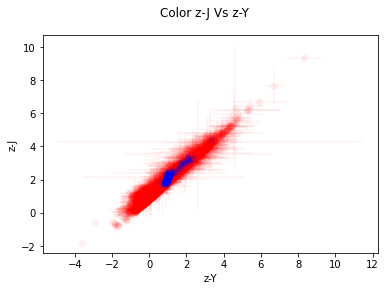

In [45]:
# Plot color Z-Y vs color Z-J
fig, ax=plt.subplots()
ax.errorbar(Non_UCD['z-Y'], Non_UCD['z-J'], xerr = Non_UCD['Z-Y unc'], 
            yerr = Non_UCD['Z-J unc'], fmt='o', alpha=0.05, color='red')
ax.errorbar(dfsel['z-Y'], dfsel['z-J'], xerr = dfsel['Z-Y unc'], 
            yerr = dfsel['Z-J unc'], fmt='^', alpha=0.1, color='blue')
ax.set(xlabel='z-Y', ylabel='z-J')
plt.suptitle("Color z-J Vs z-Y")
plt.savefig("C:/pythonplot/plot/Color z-J Vs z-Y.pdf",bbox_inches="tight",pad_inches=2,transparent=True)


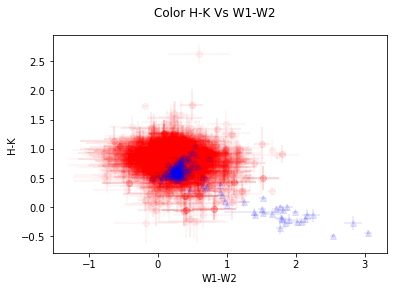

In [46]:
# Plot color W1-W2 vs color H-K
fig, ax=plt.subplots()
ax.errorbar(Non_UCD['W1-W2'], Non_UCD['H-K'], xerr = Non_UCD['W1-W2 unc'], 
            yerr = Non_UCD['H-K unc'], fmt='o', alpha=0.05, color='red')
ax.errorbar(dfsel['W1-W2'], dfsel['H-K'], xerr = dfsel['W1-W2 unc'], 
            yerr = dfsel['H-K unc'], fmt='^', alpha=0.1, color='blue')
ax.set(xlabel='W1-W2', ylabel='H-K')
plt.suptitle("Color H-K Vs W1-W2")
plt.savefig("C:/pythonplot/plot/Color H-K Vs W1-W2.pdf",bbox_inches="tight",pad_inches=2,transparent=True)


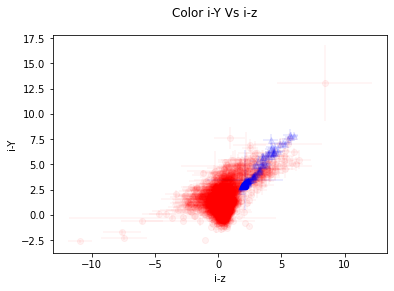

In [47]:
# Plot color i-z vs color i-Y
fig, ax=plt.subplots()
ax.errorbar(Non_UCD['i-z'], Non_UCD['i-Y'], xerr = Non_UCD['I-Z unc'], 
            yerr = Non_UCD['I-Y unc'], fmt='o', alpha=0.05, color='red')
ax.errorbar(dfsel['i-z'], dfsel['i-Y'], xerr = dfsel['I-Z unc'], 
            yerr = dfsel['I-Y unc'], fmt='^', alpha=0.1, color='blue')
ax.set(xlabel='i-z', ylabel='i-Y')
plt.suptitle("Color i-Y Vs i-z")
plt.savefig("C:/pythonplot/plot/Color i-Y Vs i-z.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

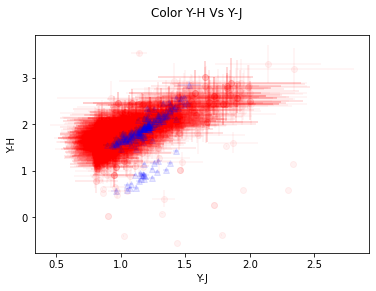

In [48]:
# Plot color Y-J vs color Y-H
fig, ax=plt.subplots()
ax.errorbar(Non_UCD['Y-J'], Non_UCD['Y-H'], xerr = Non_UCD['Y-J unc'], 
            yerr = Non_UCD['Y-H unc'], fmt='o', alpha=0.05, color='red')
ax.errorbar(dfsel['Y-J'], dfsel['Y-H'], xerr = dfsel['Y-J unc'], 
            yerr = dfsel['Y-H unc'], fmt='^', alpha=0.1, color='blue')
ax.set(xlabel='Y-J', ylabel='Y-H')
plt.suptitle("Color Y-H Vs Y-J")
plt.savefig("C:/pythonplot/plot/Color Y-H Vs Y-J.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

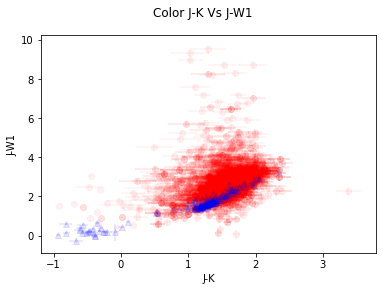

In [49]:
# Plot color J-K vs color J-W1
fig, ax=plt.subplots()
ax.errorbar(Non_UCD['J-K'], Non_UCD['J-W1'], xerr = Non_UCD['J-K unc'], 
            yerr = Non_UCD['J-W1 unc'], fmt='o', alpha=0.05, color='red')
ax.errorbar(dfsel['J-K'], dfsel['J-W1'], xerr = dfsel['J-K unc'], 
            yerr = dfsel['J-W1 unc'], fmt='^', alpha=0.1, color='blue')
ax.set(xlabel='J-K', ylabel='J-W1')
plt.suptitle("Color J-K Vs J-W1")
plt.savefig("C:/pythonplot/plot/Color J-K Vs J-W1.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

In [44]:
UCD=[]
for i in dfsel["i-z"]:
    UCD.append(1)
print(len(UCD))
dfsel['UCD/nonUCD']= UCD # UCD are going to be 1
#ds_best_nopec

233


In [45]:
UCD=[]
for i in Non_UCD['i-z']:
    UCD.append(0)
Non_UCD['UCD/nonUCD']= UCD # non-UCD are going to be 0
print(len(UCD))

4059


In [46]:
dfsel1 = dfsel.append(Non_UCD, ignore_index=True)
dfsel1

,ULAS,imag,e_imag,zmag,e_zmag,Ymag,e_Ymag,Jmag,e_Jmag,Hmag,...,ALLWISE_ID,ALLWISE_ccf,ALLWISE_ex,ALLWISE_var,ALLWISE_qph,ALLWISE_pmRA,ALLWISE_e_pmRA,ALLWISE_pmDE,ALLWISE_e_pmDE,ALLWISE_d2M
0,J000112.24+153534.3,19.920000,0.040,17.990000,0.030,16.88,0.01,15.46,0.01,14.48,...,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,NaN
1,J000334.77-001258.8,20.680000,0.060,18.740000,0.040,17.90,0.03,16.69,0.02,15.88,...,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,NaN
2,J000646.79+151225.7,20.640000,0.060,18.570000,0.060,17.57,0.02,16.21,0.01,15.38,...,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,NaN
3,J001608.49-004302.2,20.820000,0.060,18.620000,0.040,17.70,0.02,16.30,0.01,15.34,...,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,NaN
4,J002138.89+002605.6,21.030000,0.080,19.240000,0.070,18.64,0.06,17.34,0.03,16.59,...,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4287,NaN,20.566000,0.094,20.285999,0.225,NaN,NaN,NaN,NaN,NaN,...,1807109001351043121,0000,0.0,0nnn,ABCU,726,649,-47,720,NaN
4288,NaN,21.863001,0.286,21.381001,0.621,NaN,NaN,NaN,NaN,NaN,...,1807109001351043121,0000,0.0,0nnn,ABCU,726,649,-47,720,NaN
4289,NaN,22.139000,0.221,21.292000,0.301,NaN,NaN,NaN,NaN,NaN,...,1807109001351043121,0000,0.0,0nnn,ABCU,726,649,-47,720,NaN
4290,NaN,20.979000,0.159,21.207001,0.682,NaN,NaN,NaN,NaN,NaN,...,1799110601351039628,0000,0.0,0nnn,ABUU,-2454,815,520,881,NaN


In [47]:
print(list(dfsel1.columns))

['ULAS', 'imag', 'e_imag', 'zmag', 'e_zmag', 'Ymag', 'e_Ymag', 'Jmag', 'e_Jmag', 'Hmag', 'e_Hmag', 'Kmag', 'e_Kmag', 'W1mag', 'e_W1mag', 'W2mag', 'e_W2mag', 'PhType', 'chi2', 'SpType', 'Ref', 'Simbad', 'RA', 'DEC', 'SpType2', 'SpectralTnum', 'i-z', 'i-Y', 'i-J', 'i-H', 'i-K', 'i-W1', 'i-W2', 'z-Y', 'z-J', 'z-H', 'z-K', 'z-W1', 'z-W2', 'Y-J', 'Y-H', 'Y-K', 'Y-W1', 'Y-W2', 'J-H', 'J-K', 'J-W1', 'J-W2', 'H-K', 'H-W1', 'H-W2', 'K-W1', 'K-W2', 'W1-W2', 'I-Z unc', 'I-Y unc', 'I-J unc', 'I-H unc', 'I-K unc', 'I-W1 unc', 'I-W2 unc', 'Z-Y unc', 'Z-J unc', 'Z-H unc', 'Z-K unc', 'Z-W1 unc', 'Z-W2 unc', 'Y-J unc', 'Y-H unc', 'Y-K unc', 'Y-W1 unc', 'Y-W2 unc', 'J-H unc', 'J-K unc', 'J-W1 unc', 'J-W2 unc', 'H-K unc', 'H-W1 unc', 'H-W2 unc', 'K-W1 unc', 'K-W2 unc', 'W1-W2 unc', 'SpSubT', 'DESIGNATION', 'COORDINATES', 'UKIDSS_angDist', 'UKIDSS_JName', 'UKIDSS_yAperMag3', 'UKIDSS_yAperMag3Err', 'UKIDSS_j_1AperMag3', 'UKIDSS_j_1AperMag3Err', 'UKIDSS_hAperMag3', 'UKIDSS_hAperMag3Err', 'UKIDSS_kAperMag3',

In [48]:
df=pd.DataFrame({'UKIDSS_j_1AperMag3'})

df_check=df.isnull()

print(df_check)

       0
0  False


In [49]:
#dfsel1.to_csv('mytable.csv',index=False)

In [50]:
dfsel1 = dfsel1[dfsel1['UKIDSS_j_1AperMag3'].notna()==True]

In [52]:
dfsel1

,ULAS,imag,e_imag,zmag,e_zmag,Ymag,e_Ymag,Jmag,e_Jmag,Hmag,...,ALLWISE_ID,ALLWISE_ccf,ALLWISE_ex,ALLWISE_var,ALLWISE_qph,ALLWISE_pmRA,ALLWISE_e_pmRA,ALLWISE_pmDE,ALLWISE_e_pmDE,ALLWISE_d2M
0,J000112.24+153534.3,19.920000,0.040,17.990000,0.030,16.88,0.01,15.46,0.01,14.48,...,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,NaN
1,J000334.77-001258.8,20.680000,0.060,18.740000,0.040,17.90,0.03,16.69,0.02,15.88,...,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,NaN
2,J000646.79+151225.7,20.640000,0.060,18.570000,0.060,17.57,0.02,16.21,0.01,15.38,...,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,NaN
3,J001608.49-004302.2,20.820000,0.060,18.620000,0.040,17.70,0.02,16.30,0.01,15.34,...,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,NaN
4,J002138.89+002605.6,21.030000,0.080,19.240000,0.070,18.64,0.06,17.34,0.03,16.59,...,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4287,NaN,20.566000,0.094,20.285999,0.225,NaN,NaN,NaN,NaN,NaN,...,1807109001351043121,0000,0.0,0nnn,ABCU,726,649,-47,720,NaN
4288,NaN,21.863001,0.286,21.381001,0.621,NaN,NaN,NaN,NaN,NaN,...,1807109001351043121,0000,0.0,0nnn,ABCU,726,649,-47,720,NaN
4289,NaN,22.139000,0.221,21.292000,0.301,NaN,NaN,NaN,NaN,NaN,...,1807109001351043121,0000,0.0,0nnn,ABCU,726,649,-47,720,NaN
4290,NaN,20.979000,0.159,21.207001,0.682,NaN,NaN,NaN,NaN,NaN,...,1799110601351039628,0000,0.0,0nnn,ABUU,-2454,815,520,881,NaN


In [57]:
dfsel1.to_csv('backgound (non-UCD) sources from a 1deg field centered at 12h+10deg with 233 data of originaldataset.csv',index=False)

In [97]:
from sklearn.model_selection import train_test_split
RSEED = 40 

#remove 
feats = list(dfsel1.columns)
feats.remove('UKIDSS_mergedClass')
feats.remove('ULAS')
feats.remove('imag')
feats.remove('e_imag')
feats.remove('zmag')
feats.remove('e_zmag')
feats.remove('Ymag')
feats.remove('e_Ymag')
feats.remove('Jmag')
feats.remove('e_Jmag')
feats.remove('Hmag')
feats.remove('e_Hmag')
feats.remove('Kmag')
feats.remove('e_Kmag')
feats.remove('W1mag')
feats.remove('e_W1mag')
feats.remove('W2mag')
feats.remove('e_W2mag')
feats.remove('PhType')
feats.remove('SpType')
feats.remove('Ref')
feats.remove('Simbad')
#feats.remove('RA')
#feats.remove('DEC')
feats.remove('SpType2')
feats.remove('SpectralTnum')
feats.remove('chi2')
feats.remove('I-Z unc')
feats.remove('I-Y unc')
feats.remove('I-J unc')
feats.remove('I-H unc')
feats.remove('I-K unc')
feats.remove('I-W1 unc')
feats.remove('I-W2 unc')
feats.remove('Z-Y unc')
feats.remove('Z-J unc')
feats.remove('Z-H unc')
feats.remove('Z-K unc')
feats.remove('Z-W1 unc')
feats.remove('Z-W2 unc')
feats.remove('Y-J unc')
feats.remove('Y-H unc')
feats.remove('Y-K unc')
feats.remove('Y-W1 unc')
feats.remove('Y-W2 unc')
feats.remove('J-H unc')
feats.remove('J-K unc')
feats.remove('J-W1 unc')
feats.remove('J-W2 unc')
feats.remove('H-K unc')
feats.remove('H-W1 unc')
feats.remove('H-W2 unc')
feats.remove('K-W1 unc')
feats.remove('K-W2 unc')
feats.remove('W1-W2 unc')
feats.remove('UCD/nonUCD')
feats.remove('mode')
feats.remove('cl')
feats.remove('SDSS')
feats.remove('m_SDSS')
feats.remove('zsp')
feats.remove('umag')
feats.remove('e_umag')
feats.remove('gmag')
feats.remove('e_gmag')
feats.remove('rmag')
feats.remove('e_rmag')

feats.remove('RA')
feats.remove('DEC')
feats.remove('ObsDate')
feats.remove('Q')

feats.remove('DESIGNATION')
feats.remove('COORDINATES')
feats.remove('UKIDSS_angDist')
feats.remove('UKIDSS_JName')

feats.remove('UKIDSS_ra')
feats.remove('UKIDSS_dec')
feats.remove('UKIDSS_yAperMag3')
feats.remove('UKIDSS_j_1AperMag3')

feats.remove('UKIDSS_hAperMag3')
feats.remove('UKIDSS_kAperMag3')
feats.remove('UKIDSS_yAperMag3Err')
feats.remove('UKIDSS_j_1AperMag3Err')

feats.remove('UKIDSS_hAperMag3Err')
feats.remove('UKIDSS_kAperMag3Err')
feats.remove('UKIDSS_sourceID')
feats.remove('UKIDSS_mode')

feats.remove('UKIDSS_epoch')
feats.remove('ALLWISE_angDist')
feats.remove('ALLWISE_AllWISE')
feats.remove('ALLWISE_RAJ2000')

feats.remove('ALLWISE_DEJ2000')
feats.remove('ALLWISE_eeMaj')
feats.remove('ALLWISE_eeMin')
feats.remove('ALLWISE_eePA')

feats.remove('ALLWISE_W1mag')
feats.remove('ALLWISE_W2mag')
feats.remove('ALLWISE_W3mag')
feats.remove('ALLWISE_W4mag')

feats.remove('ALLWISE_Jmag')
feats.remove('ALLWISE_Hmag')
feats.remove('ALLWISE_Kmag')
feats.remove('ALLWISE_e_W1mag')

feats.remove('ALLWISE_e_W2mag')
feats.remove('ALLWISE_e_W3mag')
feats.remove('ALLWISE_e_W4mag')
feats.remove('ALLWISE_e_Jmag')

feats.remove('ALLWISE_e_Hmag')
feats.remove('ALLWISE_e_Kmag')
feats.remove('ALLWISE_ID')
feats.remove('ALLWISE_ccf')

feats.remove('ALLWISE_ex')
feats.remove('ALLWISE_var')
feats.remove('ALLWISE_qph')
feats.remove('ALLWISE_pmRA')


feats.remove('ALLWISE_e_pmRA')
feats.remove('ALLWISE_pmDE')
feats.remove('ALLWISE_e_pmDE')
feats.remove('ALLWISE_d2M')
feats.remove('SpSubT')

X1 = np.array(dfsel1[feats])
y1 = np.array(dfsel1['UCD/nonUCD'])

X, X_test, y, y_test, ind, ind_test = train_test_split(X1,y1, np.arange(len(dfsel1)), train_size=0.70, random_state=RSEED, shuffle=True)
X_train, X_val, y_train, y_val, ind_train, ind_val = train_test_split(X,y, ind, random_state=RSEED, train_size=0.85, shuffle=True)


In [98]:
feats

['i-z',
 'i-Y',
 'i-J',
 'i-H',
 'i-K',
 'i-W1',
 'i-W2',
 'z-Y',
 'z-J',
 'z-H',
 'z-K',
 'z-W1',
 'z-W2',
 'Y-J',
 'Y-H',
 'Y-K',
 'Y-W1',
 'Y-W2',
 'J-H',
 'J-K',
 'J-W1',
 'J-W2',
 'H-K',
 'H-W1',
 'H-W2',
 'K-W1',
 'K-W2',
 'W1-W2']

In [99]:
len(X_train), len(X_val), len(X_test)

(2550, 451, 1287)

In [100]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

acc_list=[]
pre_list=[]
recall_list=[]
f_list=[]
#调n_estimators，同理可调别的参数
list1=[2,5,10,15,20,25,30,50]
for i in list1:
    
    RF2 = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators = i,max_depth=None,class_weight="balanced")

    RF2.fit(X_train, y_train)
    train_preds = RF2.predict(X_train)
    test_preds = RF2.predict(X_test)

    
    print("The raw features produce a model with accuracy ~{:.4f} !".format(accuracy_score(y_test, test_preds)))
   
    precision, recall, F1, _ = precision_recall_fscore_support(y_test, test_preds,average='micro')
    pre_list.append(precision)
    recall_list.append(recall)
    f_list.append(F1)

    print ("precision: {0:.2f}. recall: {1:.2f}, F1: {2:.2f}".format(precision, recall, F1))

The raw features produce a model with accuracy ~0.9829 !
precision: 0.98. recall: 0.98, F1: 0.98
The raw features produce a model with accuracy ~0.9922 !
precision: 0.99. recall: 0.99, F1: 0.99
The raw features produce a model with accuracy ~0.9953 !
precision: 1.00. recall: 1.00, F1: 1.00
The raw features produce a model with accuracy ~0.9953 !
precision: 1.00. recall: 1.00, F1: 1.00
The raw features produce a model with accuracy ~0.9946 !
precision: 0.99. recall: 0.99, F1: 0.99
The raw features produce a model with accuracy ~0.9953 !
precision: 1.00. recall: 1.00, F1: 1.00
The raw features produce a model with accuracy ~0.9953 !
precision: 1.00. recall: 1.00, F1: 1.00
The raw features produce a model with accuracy ~0.9969 !
precision: 1.00. recall: 1.00, F1: 1.00


In [101]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':test_preds})
df
i=0
wrong_values=[]
while i < len(df['Actual']):
    if df['Actual'][i] != df['Predicted'][i]:
        wrong_values.append(ind_test[i])
    i=i+1
print("The indeces from the original table that corresponds to the missclassified values are: ", wrong_values)

The indeces from the original table that corresponds to the missclassified values are:  [192, 2552, 4, 204]


In [102]:
dfsel1.loc[wrong_values]

,ULAS,imag,e_imag,zmag,e_zmag,Ymag,e_Ymag,Jmag,e_Jmag,Hmag,...,ALLWISE_ID,ALLWISE_ccf,ALLWISE_ex,ALLWISE_var,ALLWISE_qph,ALLWISE_pmRA,ALLWISE_e_pmRA,ALLWISE_pmDE,ALLWISE_e_pmDE,ALLWISE_d2M
192,J154432.73+265551.7,20.93,0.070,18.580000,0.040,17.65,0.02,16.24,0.01,15.32,...,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,NaN
2552,NaN,20.35,0.056,20.160999,0.147,NaN,NaN,NaN,NaN,NaN,...,1815110601351010747,0000,0.0,nnnn,BBUU,117,1429,74,1545,NaN
4,J002138.89+002605.6,21.03,0.080,19.240000,0.070,18.64,0.06,17.34,0.03,16.59,...,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,NaN
204,J163713.49+303808.6,22.04,2.980,19.950000,0.370,18.60,0.04,17.36,0.03,16.66,...,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,NaN


In [103]:
dfsel1.loc[wrong_values].to_csv('wrong_values.csv',index=False)

[[1215    1]
 [   3   68]]
99.6891996891997 % of accuracy


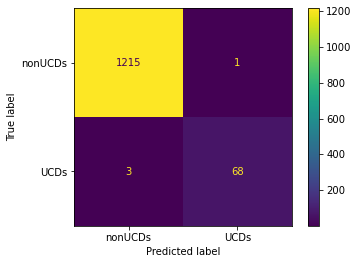

In [104]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, test_preds)
rsq = accuracy_score(y_test, test_preds)

print(cm)
print(rsq*100,'% of accuracy')

ConfusionMatrixDisplay(cm).plot()
plt.xticks([0, 1], ['nonUCDs', 'UCDs'],rotation=0)
plt.yticks([0, 1], ['nonUCDs', 'UCDs'],rotation=0)

plt.savefig("C:/pythonplot/plot/Confusion matrix classifier UCDs-NonUCDs.pdf",bbox_inches="tight",pad_inches=2,transparent=True)


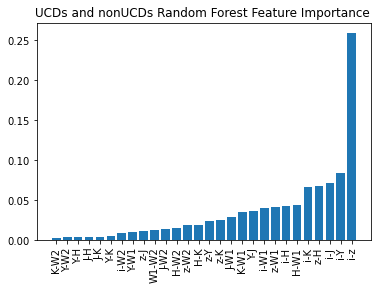

In [66]:
fig, ax=plt.subplots()

tree_feature_importances = (
    RF2.feature_importances_)
    
sorted_idx = tree_feature_importances.argsort()

x_ticks = np.arange(0, len(feats))
ax.bar(x_ticks, tree_feature_importances[sorted_idx])
ax.set_xticklabels(np.array(feats)[sorted_idx], rotation='vertical')
ax.set_xticks(x_ticks)
ax.set_title("UCDs and nonUCDs Random Forest Feature Importance ")
plt.savefig("C:/pythonplot/plot/UCDs and nonUCDs Random Forest Feature Importance.pdf",bbox_inches="tight",pad_inches=2,transparent=True)
plt.show()

In [238]:
import pickle 
with open ("RF2_pickle","wb") as f:
    pickle.dump(RF2,f)

In [117]:
from sklearn.model_selection import train_test_split
RSEED = 40 

#remove 
feats2 = list(dfsel1.columns)
feats2.remove('ULAS')
feats2.remove('imag')
feats2.remove('e_imag')
feats2.remove('zmag')
feats2.remove('e_zmag')
feats2.remove('Ymag')
feats2.remove('e_Ymag')
feats2.remove('Jmag')
feats2.remove('e_Jmag')
feats2.remove('Hmag')
feats2.remove('e_Hmag')
feats2.remove('Kmag')
feats2.remove('e_Kmag')
feats2.remove('W1mag')
feats2.remove('e_W1mag')
feats2.remove('W2mag')
feats2.remove('e_W2mag')
feats2.remove('PhType')
feats2.remove('SpType')
feats2.remove('Ref')
feats2.remove('Simbad')
feats2.remove('SpType2')
feats2.remove('SpectralTnum')
feats2.remove('chi2')
feats2.remove('I-Z unc')
feats2.remove('I-Y unc')
feats2.remove('I-J unc')
feats2.remove('I-H unc')
feats2.remove('I-K unc')
feats2.remove('I-W1 unc')
feats2.remove('I-W2 unc')
feats2.remove('Z-Y unc')
feats2.remove('Z-J unc')
feats2.remove('Z-H unc')
feats2.remove('Z-K unc')
feats2.remove('Z-W1 unc')
feats2.remove('Z-W2 unc')
feats2.remove('Y-J unc')
feats2.remove('Y-H unc')
feats2.remove('Y-K unc')
feats2.remove('Y-W1 unc')
feats2.remove('Y-W2 unc')
feats2.remove('J-H unc')
feats2.remove('J-K unc')
feats2.remove('J-W1 unc')
feats2.remove('J-W2 unc')
feats2.remove('H-K unc')
feats2.remove('H-W1 unc')
feats2.remove('H-W2 unc')
feats2.remove('K-W1 unc')
feats2.remove('K-W2 unc')
feats2.remove('W1-W2 unc')
feats2.remove('UCD/nonUCD')
feats2.remove('mode')
feats2.remove('cl')
feats2.remove('SDSS')
feats2.remove('m_SDSS')
feats2.remove('zsp')
feats2.remove('umag')
feats2.remove('e_umag')
feats2.remove('gmag')
feats2.remove('e_gmag')
feats2.remove('rmag')
feats2.remove('e_rmag')

feats2.remove('RA')
feats2.remove('DEC')
feats2.remove('ObsDate')
feats2.remove('Q')

feats2.remove('DESIGNATION')
feats2.remove('COORDINATES')
feats2.remove('UKIDSS_angDist')
feats2.remove('UKIDSS_JName')

feats2.remove('UKIDSS_ra')
feats2.remove('UKIDSS_dec')
feats2.remove('UKIDSS_yAperMag3')
feats2.remove('UKIDSS_j_1AperMag3')

feats2.remove('UKIDSS_hAperMag3')
feats2.remove('UKIDSS_kAperMag3')
feats2.remove('UKIDSS_yAperMag3Err')
feats2.remove('UKIDSS_j_1AperMag3Err')

feats2.remove('UKIDSS_hAperMag3Err')
feats2.remove('UKIDSS_kAperMag3Err')
feats2.remove('UKIDSS_sourceID')
feats2.remove('UKIDSS_mode')

feats2.remove('UKIDSS_epoch')
feats2.remove('ALLWISE_angDist')
feats2.remove('ALLWISE_AllWISE')
feats2.remove('ALLWISE_RAJ2000')

feats2.remove('ALLWISE_DEJ2000')
feats2.remove('ALLWISE_eeMaj')
feats2.remove('ALLWISE_eeMin')
feats2.remove('ALLWISE_eePA')

feats2.remove('ALLWISE_W1mag')
feats2.remove('ALLWISE_W2mag')
feats2.remove('ALLWISE_W3mag')
feats2.remove('ALLWISE_W4mag')

feats2.remove('ALLWISE_Jmag')
feats2.remove('ALLWISE_Hmag')
feats2.remove('ALLWISE_Kmag')
feats2.remove('ALLWISE_e_W1mag')

feats2.remove('ALLWISE_e_W2mag')
feats2.remove('ALLWISE_e_W3mag')
feats2.remove('ALLWISE_e_W4mag')
feats2.remove('ALLWISE_e_Jmag')

feats2.remove('ALLWISE_e_Hmag')
feats2.remove('ALLWISE_e_Kmag')
feats2.remove('ALLWISE_ID')
feats2.remove('ALLWISE_ccf')

feats2.remove('ALLWISE_ex')
feats2.remove('ALLWISE_var')
feats2.remove('ALLWISE_qph')
feats2.remove('ALLWISE_pmRA')


feats2.remove('ALLWISE_e_pmRA')
feats2.remove('ALLWISE_pmDE')
feats2.remove('ALLWISE_e_pmDE')
feats2.remove('ALLWISE_d2M')
feats2.remove('SpSubT')


X2 = np.array(dfsel1[feats2])
y2 = np.array(dfsel1['UCD/nonUCD'])

X, X_test, y, y_test, ind, ind_test = train_test_split(X2,y2, np.arange(len(dfsel1)), train_size=0.70, random_state=RSEED, shuffle=True)
X_train, X_val, y_train, y_val, ind_train, ind_val = train_test_split(X,y, ind, random_state=RSEED, train_size=0.75, shuffle=True)


In [118]:
feats2

['i-z',
 'i-Y',
 'i-J',
 'i-H',
 'i-K',
 'i-W1',
 'i-W2',
 'z-Y',
 'z-J',
 'z-H',
 'z-K',
 'z-W1',
 'z-W2',
 'Y-J',
 'Y-H',
 'Y-K',
 'Y-W1',
 'Y-W2',
 'J-H',
 'J-K',
 'J-W1',
 'J-W2',
 'H-K',
 'H-W1',
 'H-W2',
 'K-W1',
 'K-W2',
 'W1-W2',
 'UKIDSS_mergedClass']

In [119]:
len(X_train), len(X_val), len(X_test)

(2250, 751, 1287)

In [120]:
acc_list=[]
pre_list=[]
recall_list=[]
f_list=[]
#调n_estimators，同理可调别的参数
list1=[2,5,10,15,20,25,30,50]
for i in list1:
    
    RF3 = RandomForestClassifier(n_estimators = i,class_weight={0:1,1:2})

    RF3.fit(X_train, y_train)
    train_preds = RF3.predict(X_train)
    test_preds = RF3.predict(X_test)

    
    print("The raw features produce a model with accuracy ~{:.4f} !".format(accuracy_score(y_test, test_preds)))
   
    precision, recall, F1, _ = precision_recall_fscore_support(y_test, test_preds,average='micro')
    pre_list.append(precision)
    recall_list.append(recall)
    f_list.append(F1)

    print ("precision: {0:.2f}. recall: {1:.2f}, F1: {2:.2f}".format(precision, recall, F1))

The raw features produce a model with accuracy ~0.9953 !
precision: 1.00. recall: 1.00, F1: 1.00
The raw features produce a model with accuracy ~0.9953 !
precision: 1.00. recall: 1.00, F1: 1.00
The raw features produce a model with accuracy ~0.9961 !
precision: 1.00. recall: 1.00, F1: 1.00
The raw features produce a model with accuracy ~0.9953 !
precision: 1.00. recall: 1.00, F1: 1.00
The raw features produce a model with accuracy ~0.9961 !
precision: 1.00. recall: 1.00, F1: 1.00
The raw features produce a model with accuracy ~0.9969 !
precision: 1.00. recall: 1.00, F1: 1.00
The raw features produce a model with accuracy ~0.9969 !
precision: 1.00. recall: 1.00, F1: 1.00
The raw features produce a model with accuracy ~0.9969 !
precision: 1.00. recall: 1.00, F1: 1.00


In [121]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':test_preds})
df
i=0
wrong_values=[]
while i < len(df['Actual']):
    if df['Actual'][i] != df['Predicted'][i]:
        wrong_values.append(ind_test[i])
    i=i+1
print("The indeces from the original table that corresponds to the missclassified values are: ", wrong_values)

The indeces from the original table that corresponds to the missclassified values are:  [3519, 192, 4, 204]


In [122]:
dfsel1.loc[wrong_values]

,ULAS,imag,e_imag,zmag,e_zmag,Ymag,e_Ymag,Jmag,e_Jmag,Hmag,...,ALLWISE_ID,ALLWISE_ccf,ALLWISE_ex,ALLWISE_var,ALLWISE_qph,ALLWISE_pmRA,ALLWISE_e_pmRA,ALLWISE_pmDE,ALLWISE_e_pmDE,ALLWISE_d2M
3519,NaN,22.143999,0.189,21.808001,0.415,NaN,NaN,NaN,NaN,NaN,...,1807109001351038373,0000,0.0,1nnn,ABUU,48,846,-187,922,NaN
192,J154432.73+265551.7,20.930000,0.070,18.580000,0.040,17.65,0.02,16.24,0.01,15.32,...,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,NaN
4,J002138.89+002605.6,21.030000,0.080,19.240000,0.070,18.64,0.06,17.34,0.03,16.59,...,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,NaN
204,J163713.49+303808.6,22.040000,2.980,19.950000,0.370,18.60,0.04,17.36,0.03,16.66,...,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,NaN


In [123]:
dfsel1.loc[wrong_values].to_csv('wrong_values2.csv',index=False)

[[1215    1]
 [   3   68]]
99.6891996891997 % of accuracy


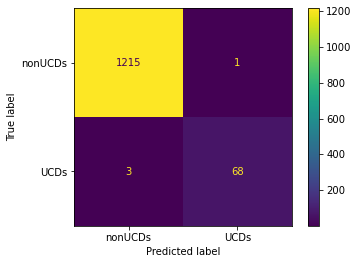

In [124]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, test_preds)
rsq = accuracy_score(y_test, test_preds)

print(cm)
print(rsq*100,'% of accuracy')

ConfusionMatrixDisplay(cm).plot()
plt.xticks([0, 1], ['nonUCDs', 'UCDs'],rotation=0)
plt.yticks([0, 1], ['nonUCDs', 'UCDs'],rotation=0)

plt.savefig("C:/pythonplot/plot/Confusion matrix classifier UCDs-NonUCDs-mergedclass.pdf",bbox_inches="tight",pad_inches=2,transparent=True)


In [75]:
RF3.feature_importances_

array([0.23584765, 0.06837223, 0.09168125, 0.09175834, 0.03704775,
       0.02686429, 0.02393096, 0.02367164, 0.00964806, 0.04093993,
       0.02317626, 0.03661193, 0.00396146, 0.03715712, 0.00192004,
       0.00227324, 0.00490304, 0.00579191, 0.00366605, 0.00270397,
       0.03036126, 0.02226492, 0.01202424, 0.0312151 , 0.00743994,
       0.0238177 , 0.00575022, 0.00836942, 0.08683008])

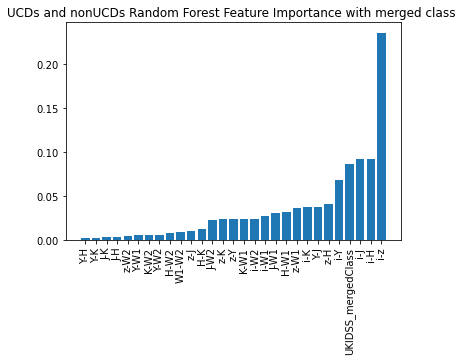

In [76]:
fig, ax=plt.subplots()

tree_feature_importances = (
    RF3.feature_importances_)
    
sorted_idx = tree_feature_importances.argsort()

x_ticks = np.arange(0, len(feats2))
ax.bar(x_ticks, tree_feature_importances[sorted_idx])
ax.set_xticklabels(np.array(feats2)[sorted_idx], rotation='vertical')
ax.set_xticks(x_ticks)
ax.set_title("Random Forest Feature Importance ")
ax.set_title("UCDs and nonUCDs Random Forest Feature Importance with merged class ")
plt.savefig("C:/pythonplot/plot/UCDs and nonUCDs Random Forest Feature Importance with merged class.pdf",bbox_inches="tight",pad_inches=2,transparent=True)
plt.show()

In [239]:
import pickle 
with open ("RF3_pickle","wb") as f:
    pickle.dump(RF3,f)

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

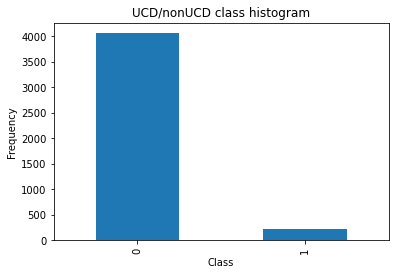

In [127]:
pd.value_counts(dfsel1['UCD/nonUCD']).plot.bar()
plt.title('UCD/nonUCD class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
dfsel1['UCD/nonUCD'].value_counts()
plt.savefig("C:/pythonplot/plot/UCD-nonUCD class histogram.pdf",bbox_inches="tight",pad_inches=2,transparent=True)


In [166]:
X3 = np.array(dfsel1[feats])
y3 = np.array(dfsel1['UCD/nonUCD'])

In [167]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (3001, 28)
Number transactions y_train dataset:  (3001,)
Number transactions X_test dataset:  (1287, 28)
Number transactions y_test dataset:  (1287,)


In [168]:
# logistic regression object
lr = LogisticRegression()
  
# train the model on train set
lr.fit(X_train, y_train.ravel())
  
predictions = lr.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1215
           1       0.71      0.85      0.77        72

    accuracy                           0.97      1287
   macro avg       0.85      0.91      0.88      1287
weighted avg       0.98      0.97      0.97      1287



In [169]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 157
Before OverSampling, counts of label '0': 2844 

After OverSampling, the shape of train_X: (5688, 28)
After OverSampling, the shape of train_y: (5688,) 

After OverSampling, counts of label '1': 2844
After OverSampling, counts of label '0': 2844


In [170]:
lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1215
           1       0.60      1.00      0.75        72

    accuracy                           0.96      1287
   macro avg       0.80      0.98      0.86      1287
weighted avg       0.98      0.96      0.97      1287



In [171]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()
  
X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel())
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 157
Before Undersampling, counts of label '0': 2844 

After Undersampling, the shape of train_X: (314, 28)
After Undersampling, the shape of train_y: (314,) 

After Undersampling, counts of label '1': 157
After Undersampling, counts of label '0': 157


Recall metric in the train dataset: 100.0%


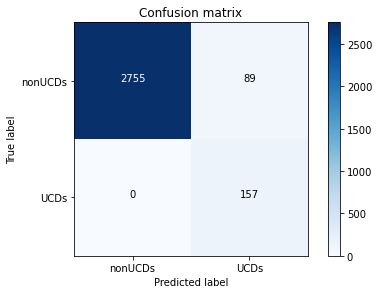

<Figure size 432x288 with 0 Axes>

In [172]:
y_train_pre = lr1.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()
plt.savefig("C:/pythonplot/plot/confusion matrix lg.pdf",bbox_inches="tight",pad_inches=2,transparent=True)


In [173]:
# train the model on train set
lr2 = LogisticRegression()
lr2.fit(X_train_miss, y_train_miss.ravel())
predictions = lr2.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1215
           1       0.45      0.97      0.61        72

    accuracy                           0.93      1287
   macro avg       0.72      0.95      0.79      1287
weighted avg       0.97      0.93      0.94      1287



In [174]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr2 = LogisticRegression()
clf = GridSearchCV(lr2, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             verbose=5)

In [175]:
clf.best_params_

{'C': 8.0}

In [176]:
lr2 = LogisticRegression(C=4,penalty='l2', verbose=5)
lr2.fit(X_train_res, y_train_res.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=4, verbose=5)

In [177]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.yticks([0, 1], ['nonUCDs', 'UCDs'],rotation=0)
    plt.xticks([0, 1], ['nonUCDs', 'UCDs'],rotation=0)


Recall metric in the testing dataset: 100.0%


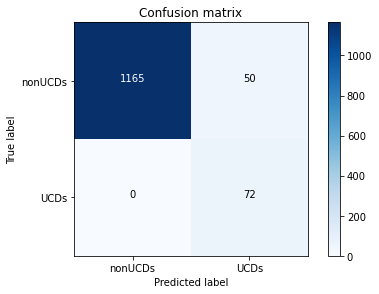

<Figure size 432x288 with 0 Axes>

In [178]:
y_pre = lr2.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pre)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()
plt.savefig("C:/pythonplot/plot/confusion matrix lr2.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

In [179]:
tmp = lr2.fit(X_train_res, y_train_res.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


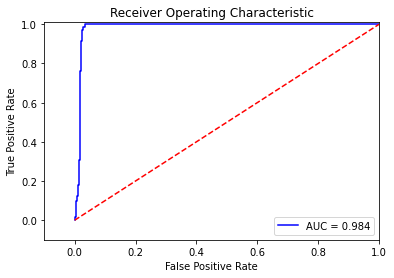

<Figure size 432x288 with 0 Axes>

In [180]:
y_pred_sample_score = tmp.decision_function(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.savefig("C:/pythonplot/plot/ROC UCDsNonUCDs.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

In [181]:
roc_auc

0.9838591678097851

In [204]:
X4 = np.array(dfsel1[feats])
y4 = np.array(dfsel1['UCD/nonUCD'])

In [205]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (3001, 28)
Number transactions y_train dataset:  (3001,)
Number transactions X_test dataset:  (1287, 28)
Number transactions y_test dataset:  (1287,)


In [206]:
# logistic regression object
lr = LogisticRegression()
  
# train the model on train set
lr.fit(X_train, y_train.ravel())
  
predictions = lr.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1215
           1       0.71      0.85      0.77        72

    accuracy                           0.97      1287
   macro avg       0.85      0.91      0.88      1287
weighted avg       0.98      0.97      0.97      1287



In [207]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 157
Before OverSampling, counts of label '0': 2844 

After OverSampling, the shape of train_X: (5688, 28)
After OverSampling, the shape of train_y: (5688,) 

After OverSampling, counts of label '1': 2844
After OverSampling, counts of label '0': 2844


In [208]:
lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1215
           1       0.60      1.00      0.75        72

    accuracy                           0.96      1287
   macro avg       0.80      0.98      0.86      1287
weighted avg       0.98      0.96      0.97      1287



In [209]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()
  
X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel())
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 157
Before Undersampling, counts of label '0': 2844 

After Undersampling, the shape of train_X: (314, 28)
After Undersampling, the shape of train_y: (314,) 

After Undersampling, counts of label '1': 157
After Undersampling, counts of label '0': 157


In [210]:
# train the model on train set
lr_2 = LogisticRegression()
lr_2.fit(X_train_miss, y_train_miss.ravel())
predictions = lr2.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1215
           1       0.59      1.00      0.74        72

    accuracy                           0.96      1287
   macro avg       0.80      0.98      0.86      1287
weighted avg       0.98      0.96      0.97      1287



In [211]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr2 = LogisticRegression()
clf = GridSearchCV(lr2, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             verbose=5)

In [212]:
clf.best_params_

{'C': 8.0}

In [213]:
lr2 = LogisticRegression(C=4,penalty='l2', verbose=5)
lr2.fit(X_train_res, y_train_res.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=4, verbose=5)

In [216]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.yticks([0, 1], ['nonUCDs', 'UCDs'],rotation=0)
    plt.xticks([0, 1], ['nonUCDs', 'UCDs'],rotation=0)

Recall metric in the train dataset: 100.0%


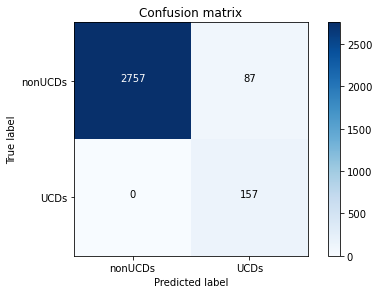

<Figure size 432x288 with 0 Axes>

In [219]:
y_train_pre = lr2.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()
plt.savefig("C:/pythonplot/plot/confusion matrix lr2nearmiss.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

Recall metric in the testing dataset: 100.0%


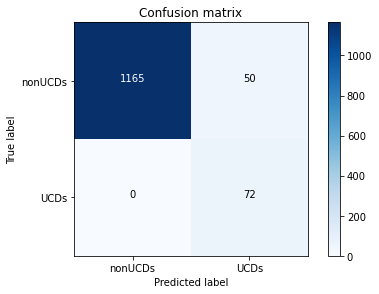

<Figure size 432x288 with 0 Axes>

In [220]:
y_pre = lr2.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pre)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()
plt.savefig("C:/pythonplot/plot/confusion matrix lr2nearmiss2.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

In [222]:
tmp = lr2.fit(X_train_res, y_train_res.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


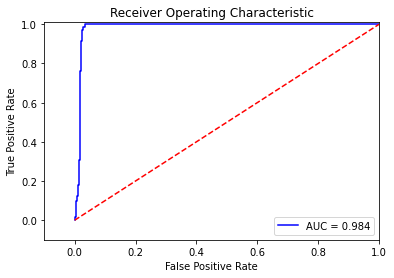

<Figure size 432x288 with 0 Axes>

In [223]:
y_pred_sample_score = tmp.decision_function(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.savefig("C:/pythonplot/plot/ROC UCDsNonUCDs balanced.pdf",bbox_inches="tight",pad_inches=2,transparent=True)

In [224]:
roc_auc

0.9838591678097851